## Investigation On Intervals and Determine whether it's meal

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import numpy as np
import intervals as invs
import warnings
from path import fr1_male_path, fr1_female_path, fr1_male_sheets, fr1_female_sheets

export_root = '../WT_export/Figure 3/Supplementary 3'
os.makedirs(export_root, exist_ok=True)
warnings.filterwarnings('ignore')
alpha = 0.1
import meals as ml
import tools as tl
import intervals as invs
from accuracy import graph_group_stats
from preprocessing import read_excel_by_sheet

## Control Group

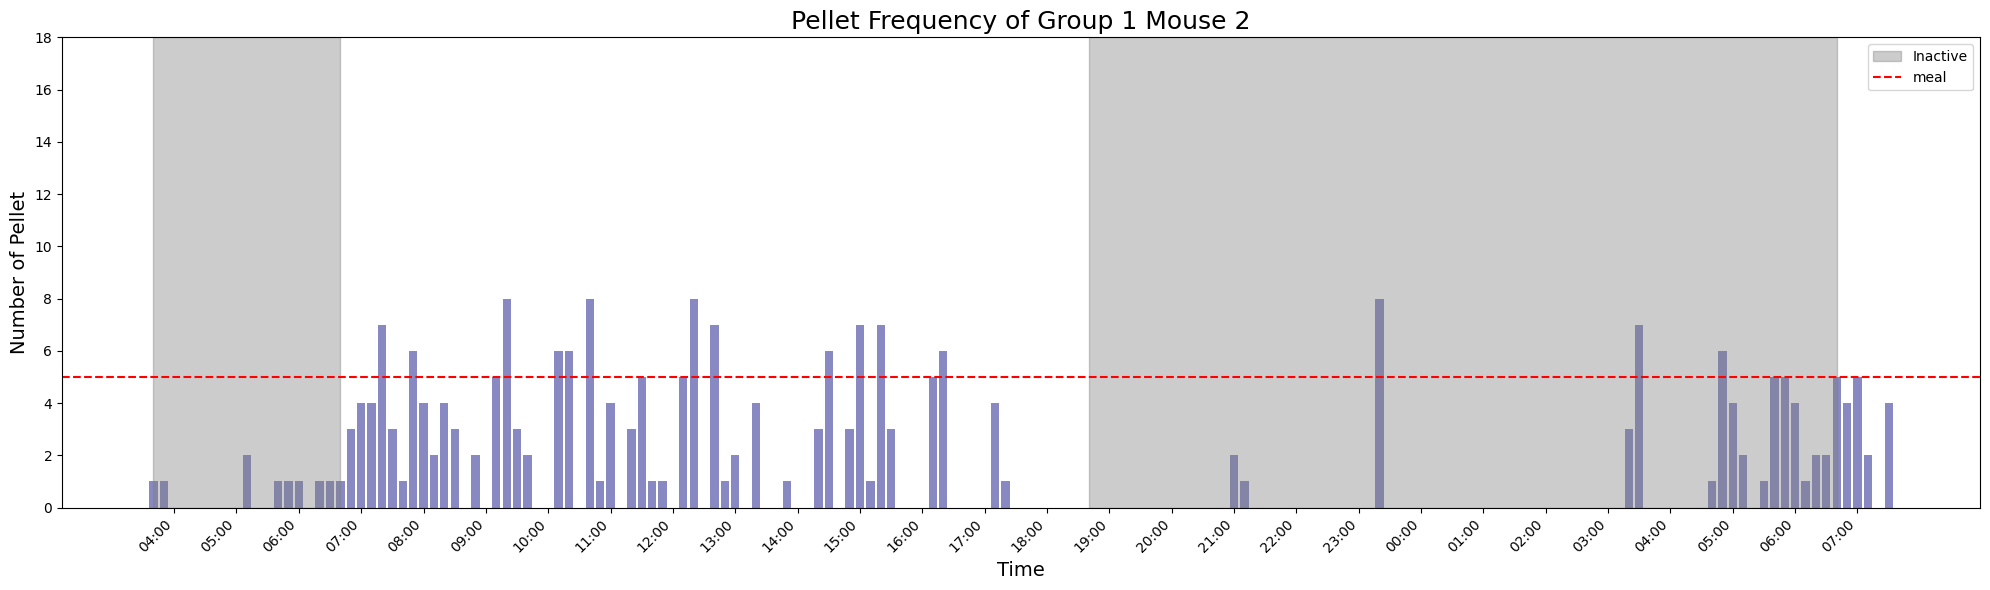

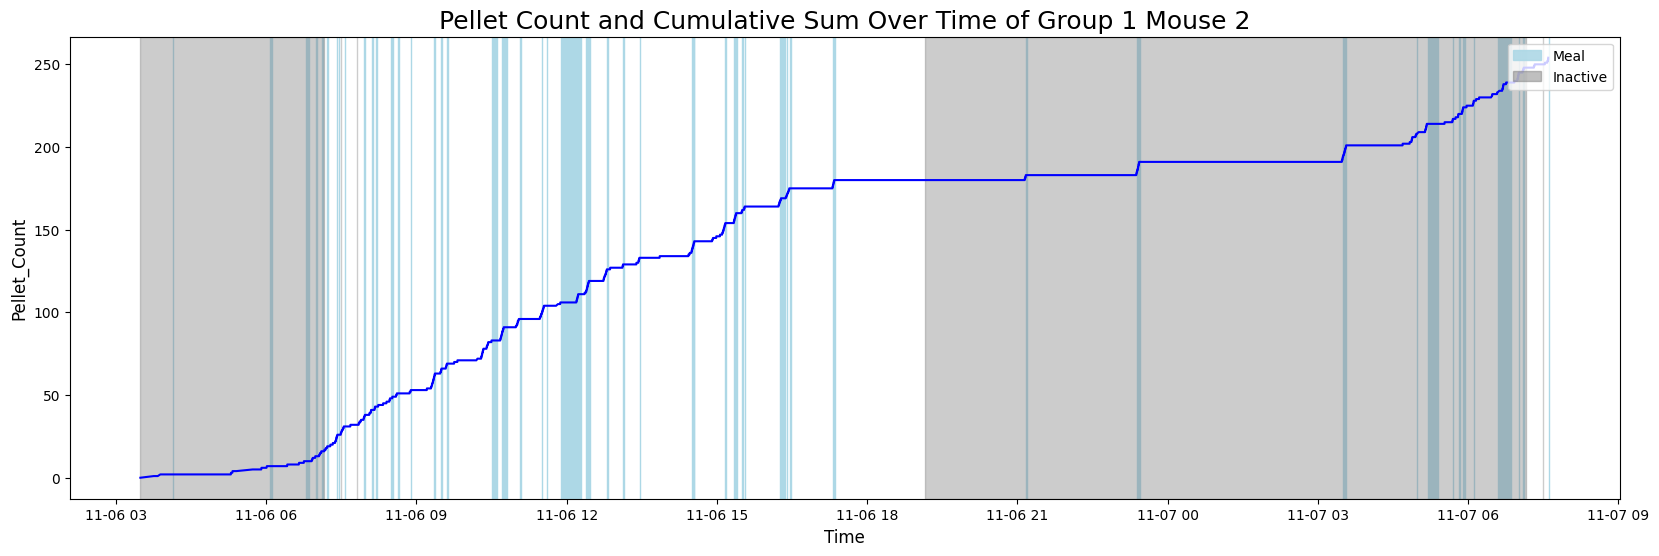

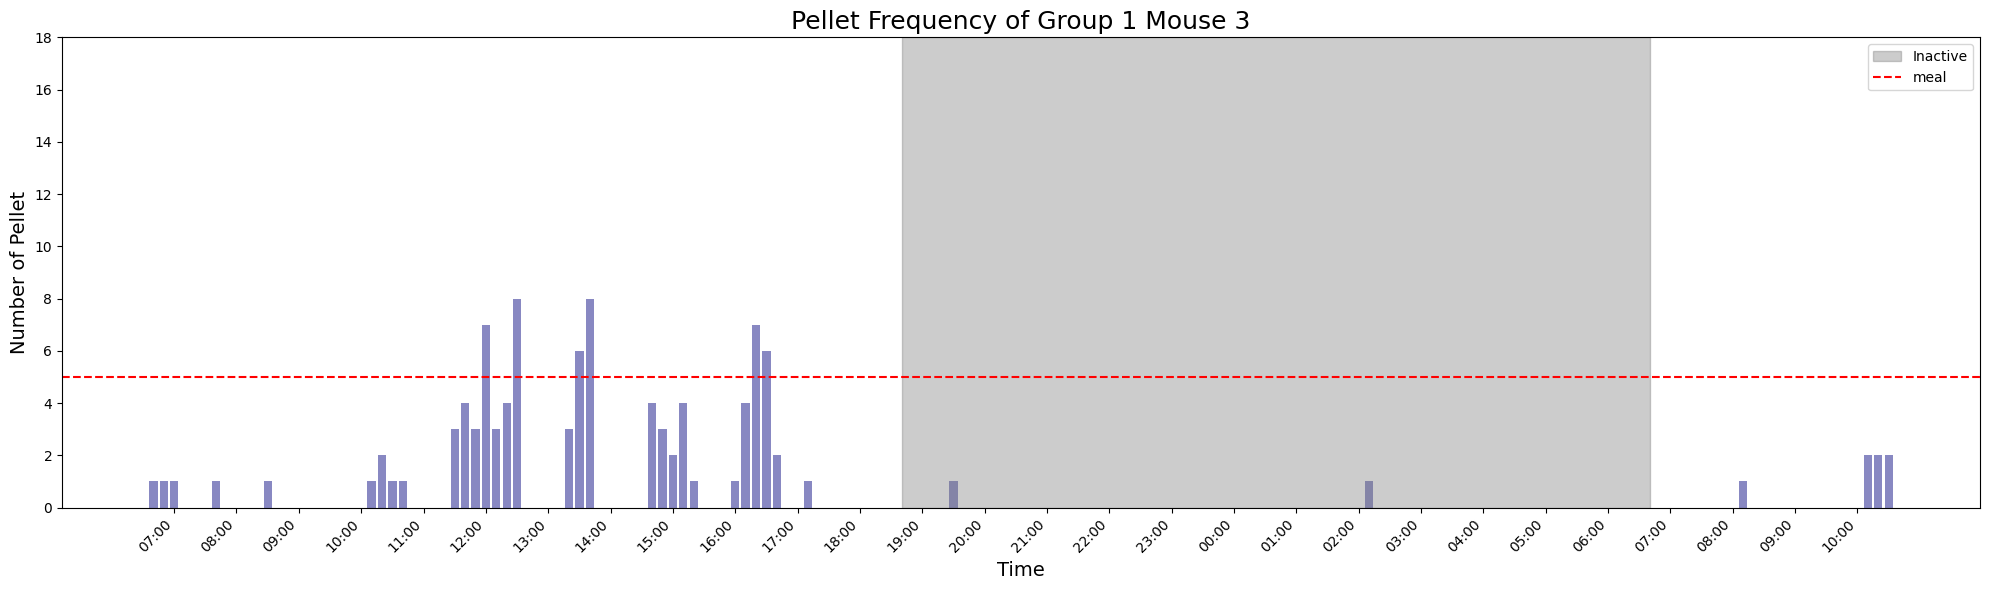

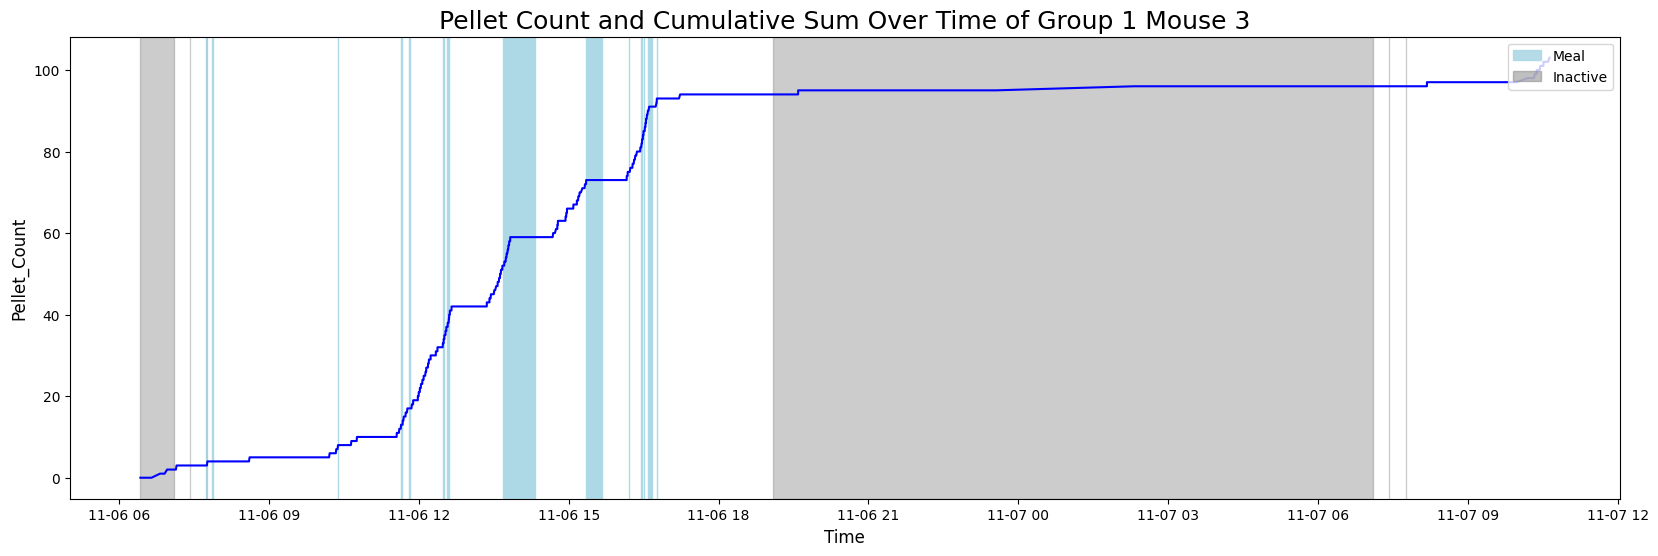

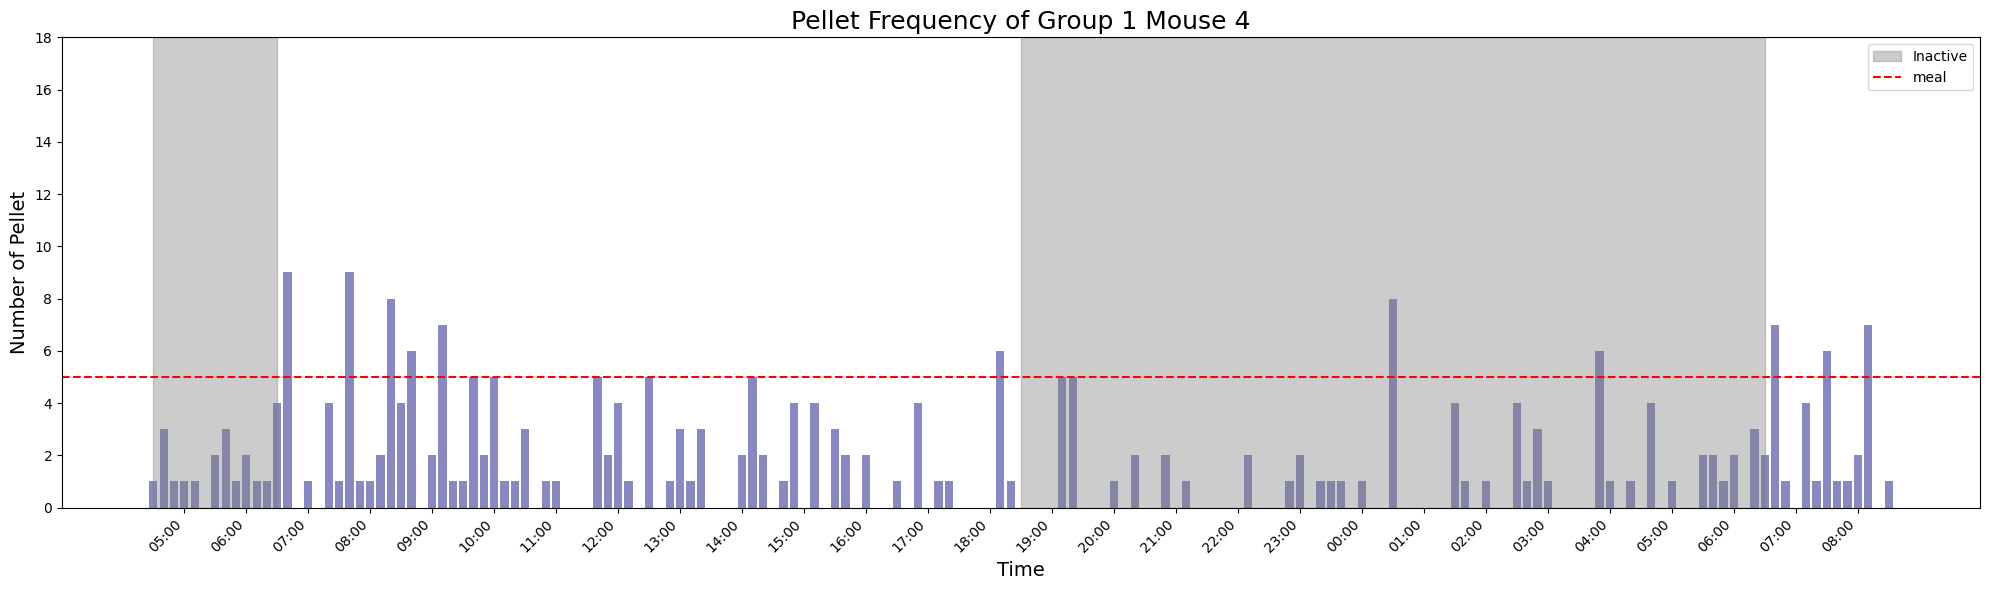

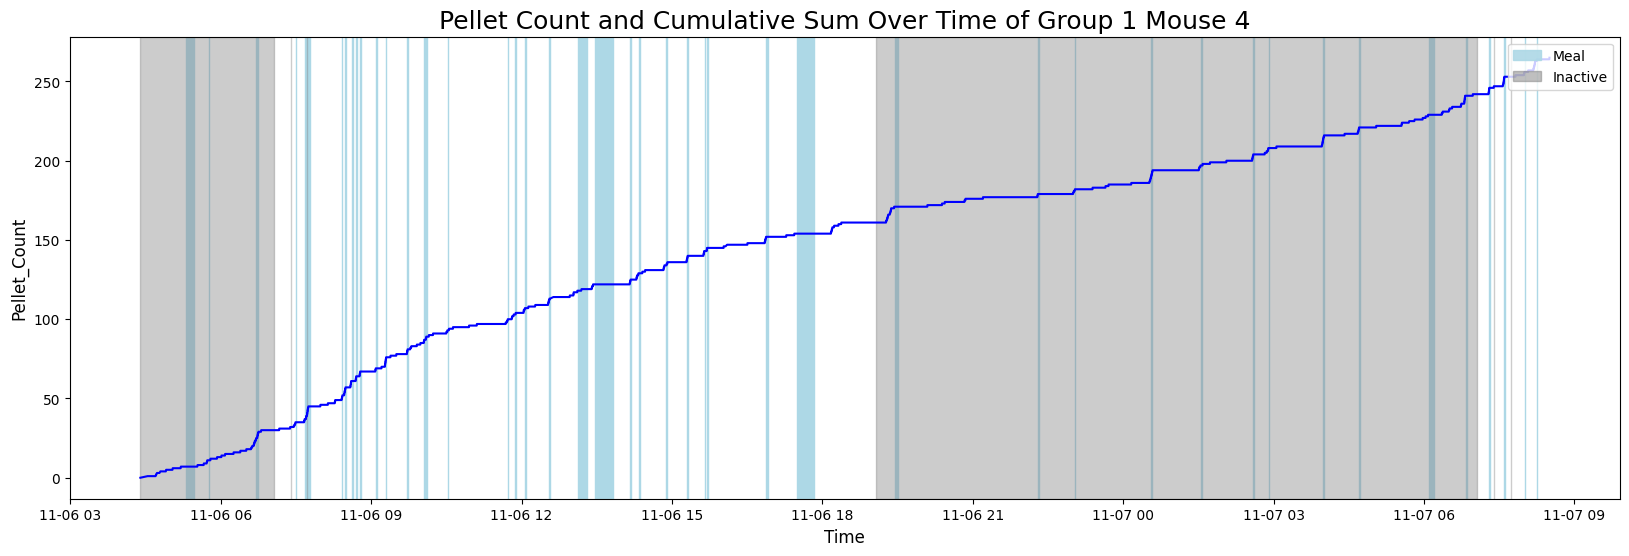

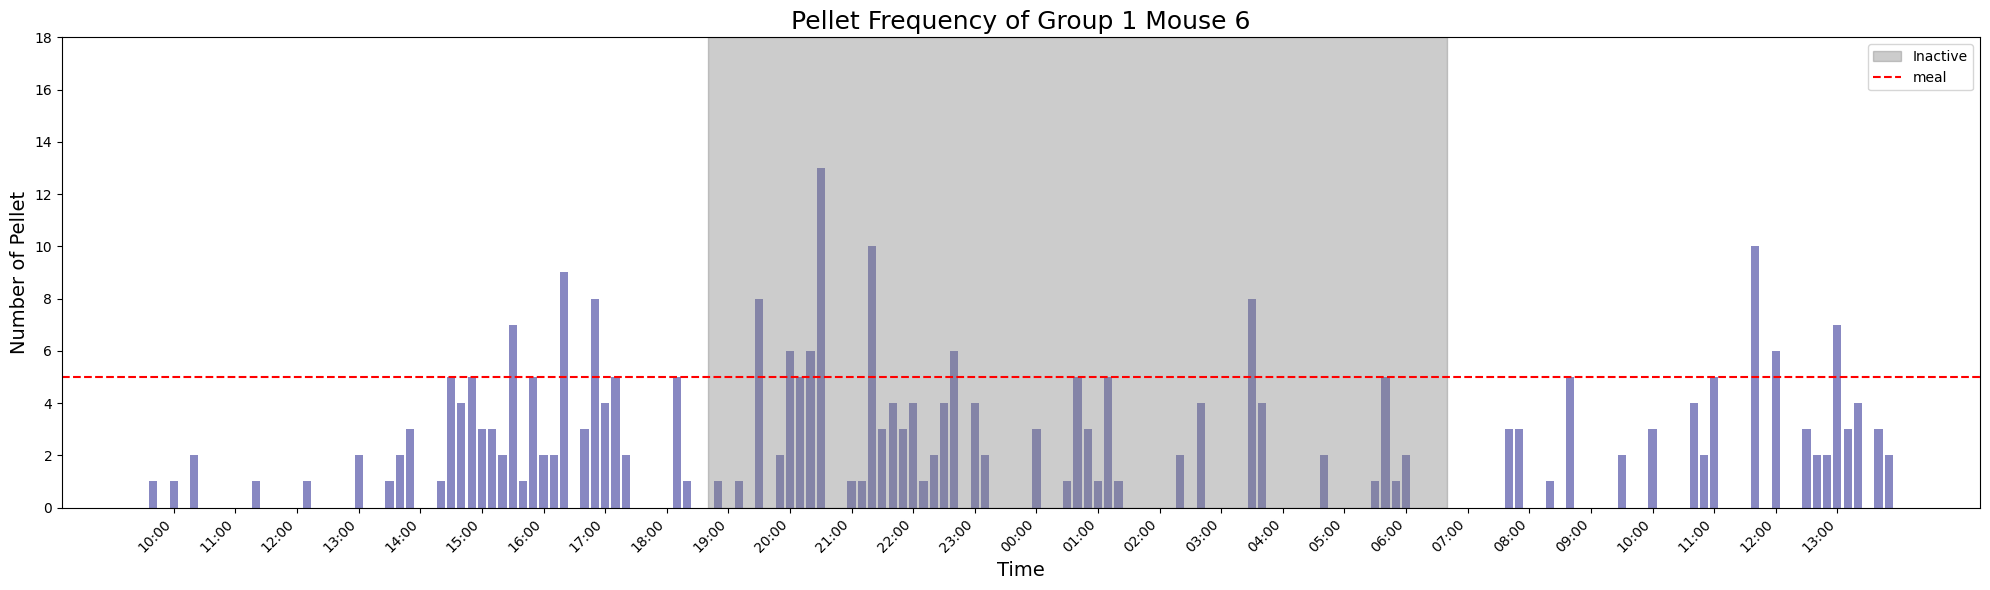

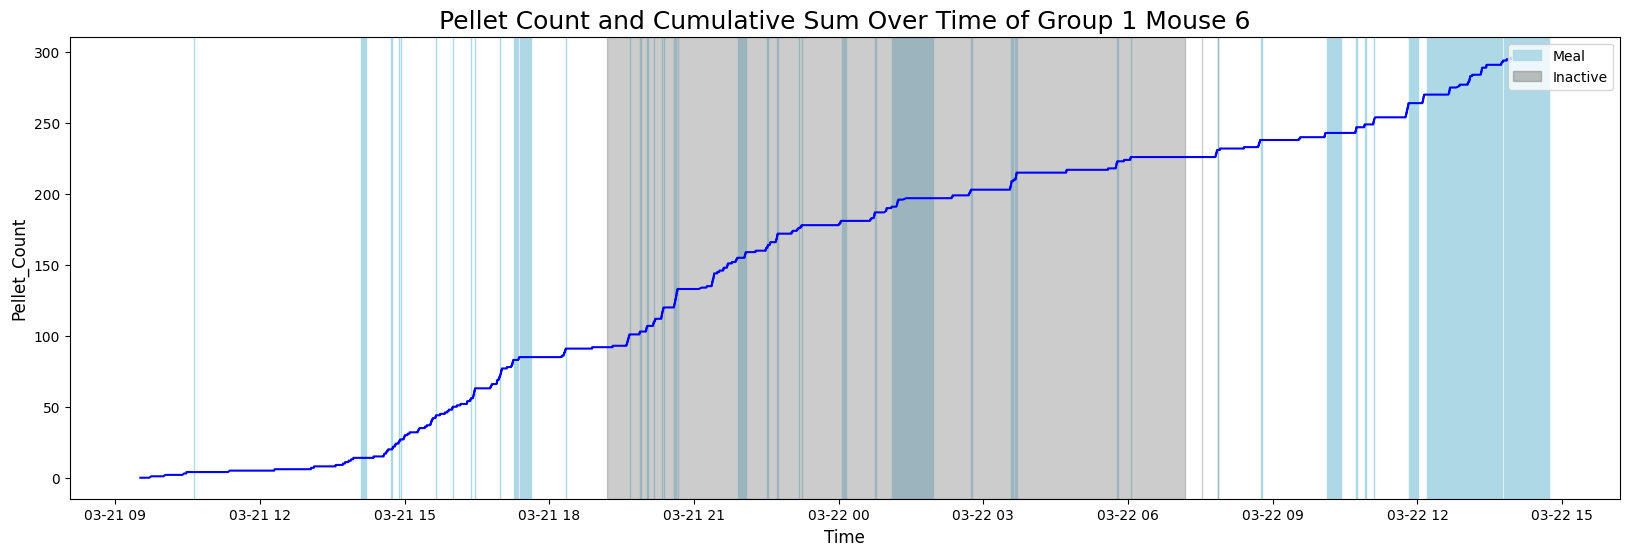

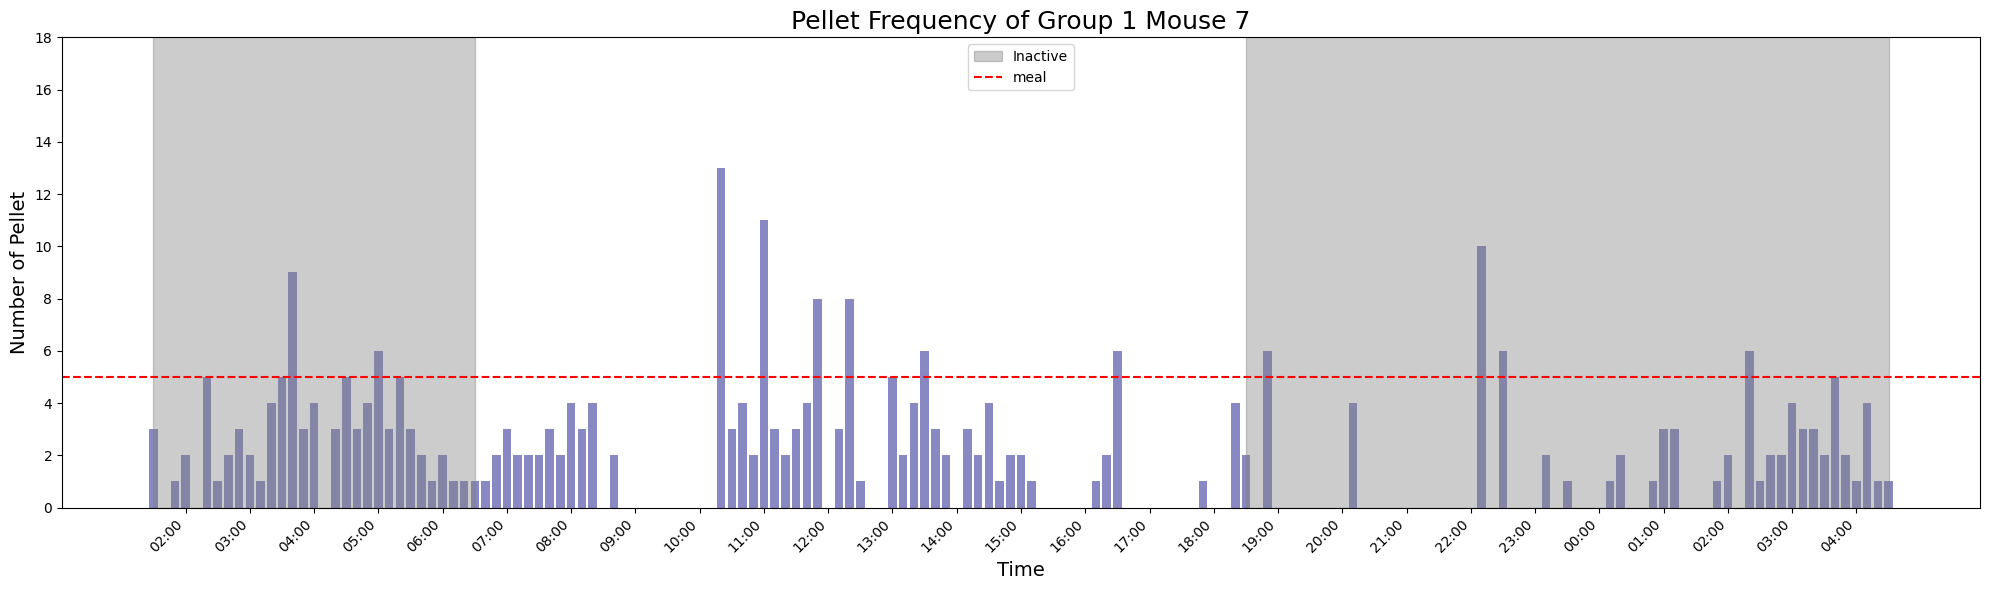

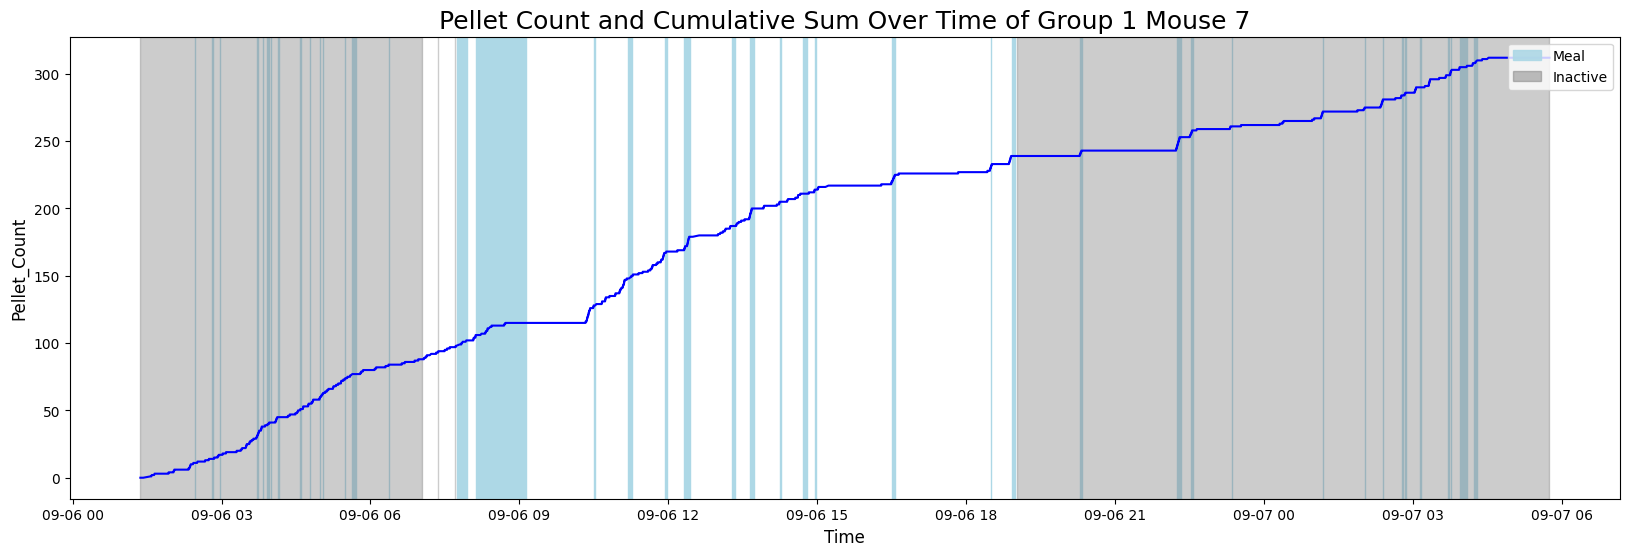

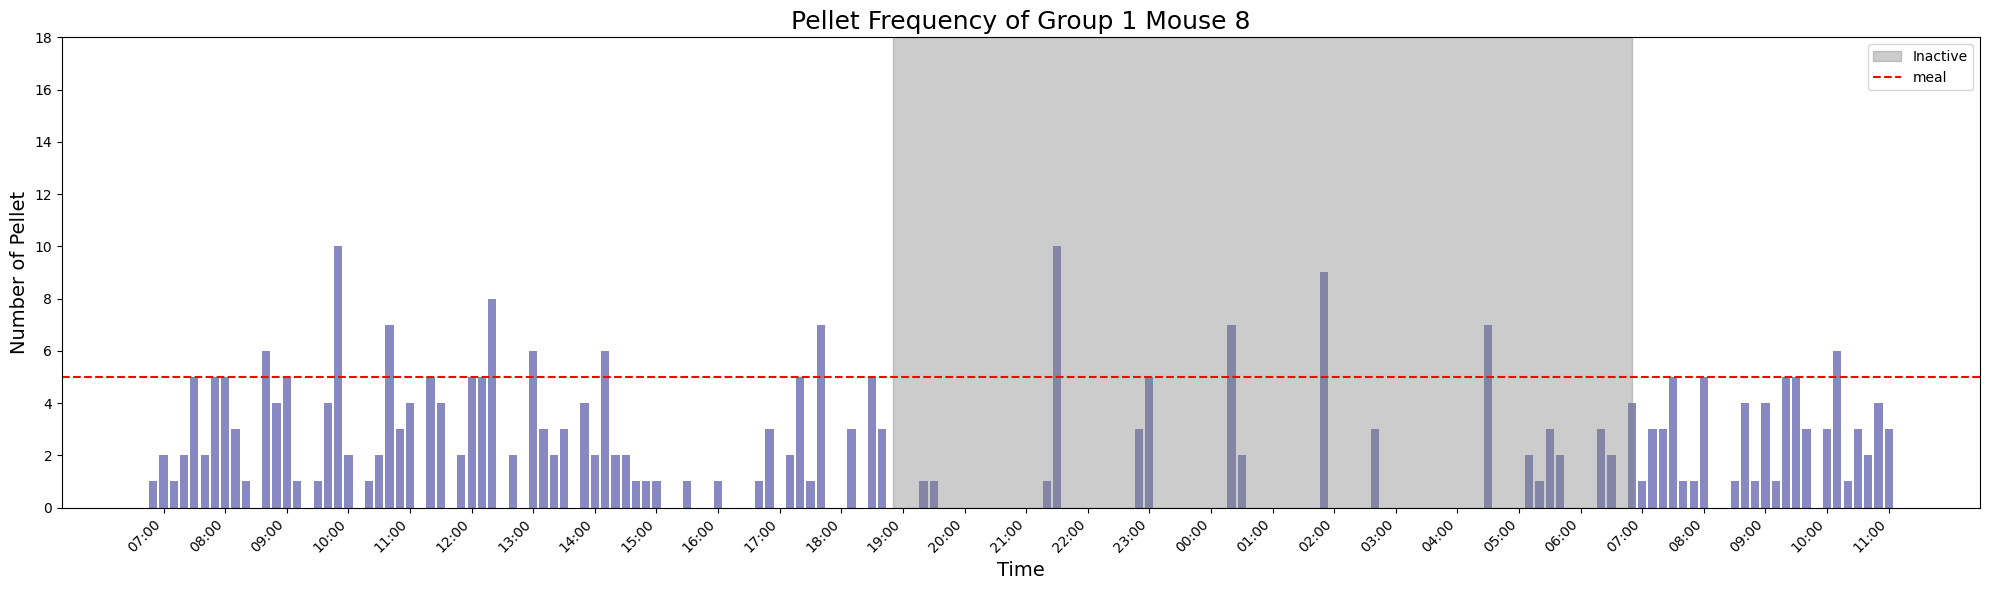

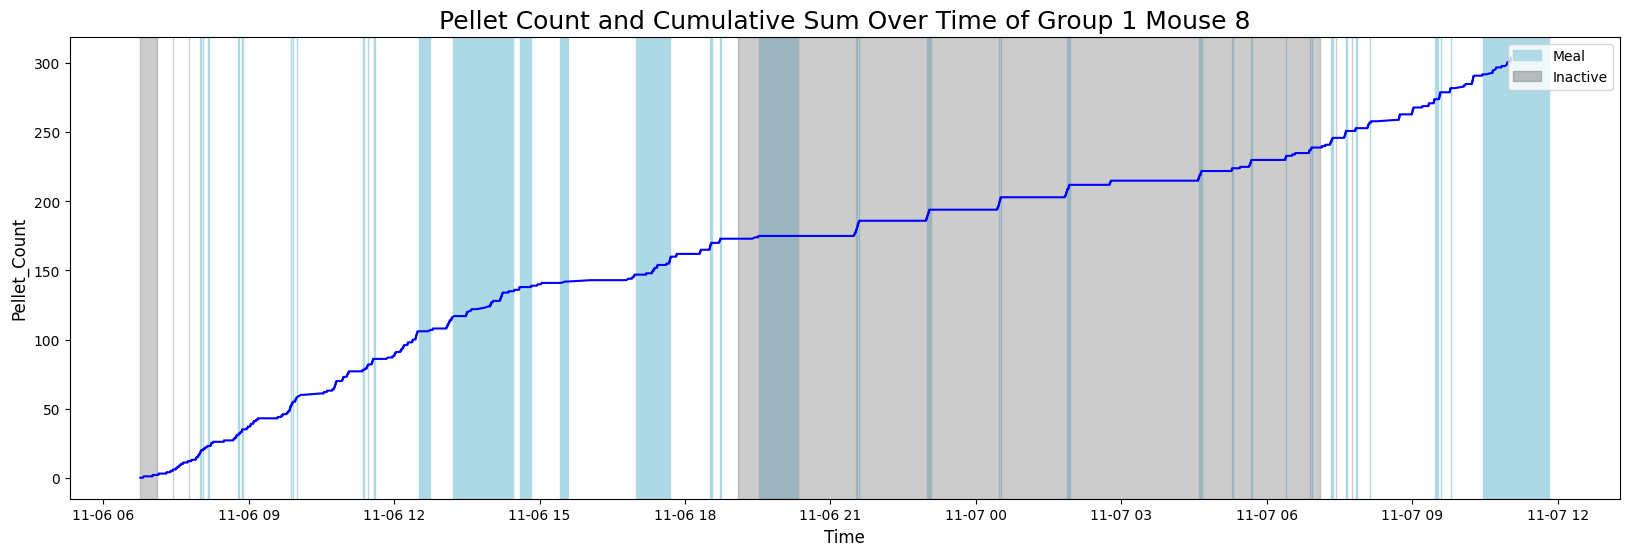

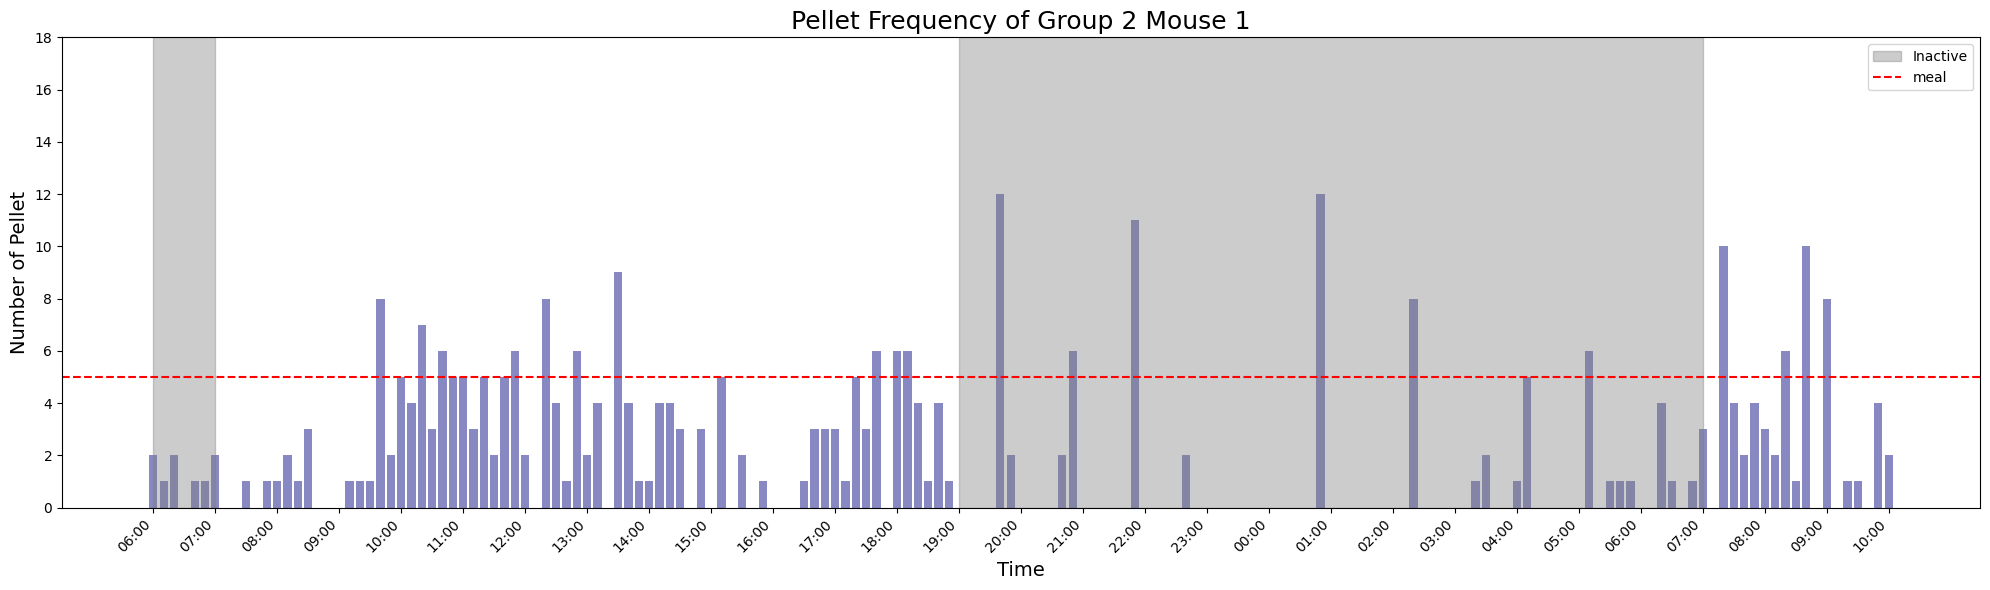

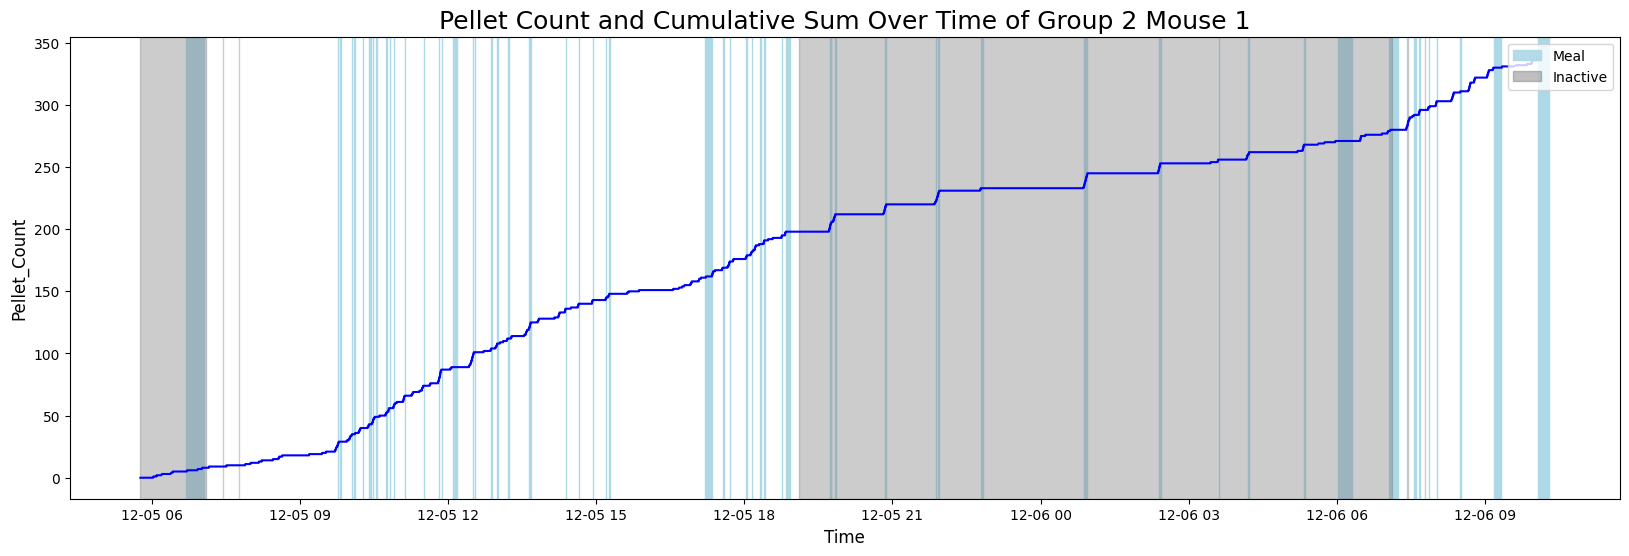

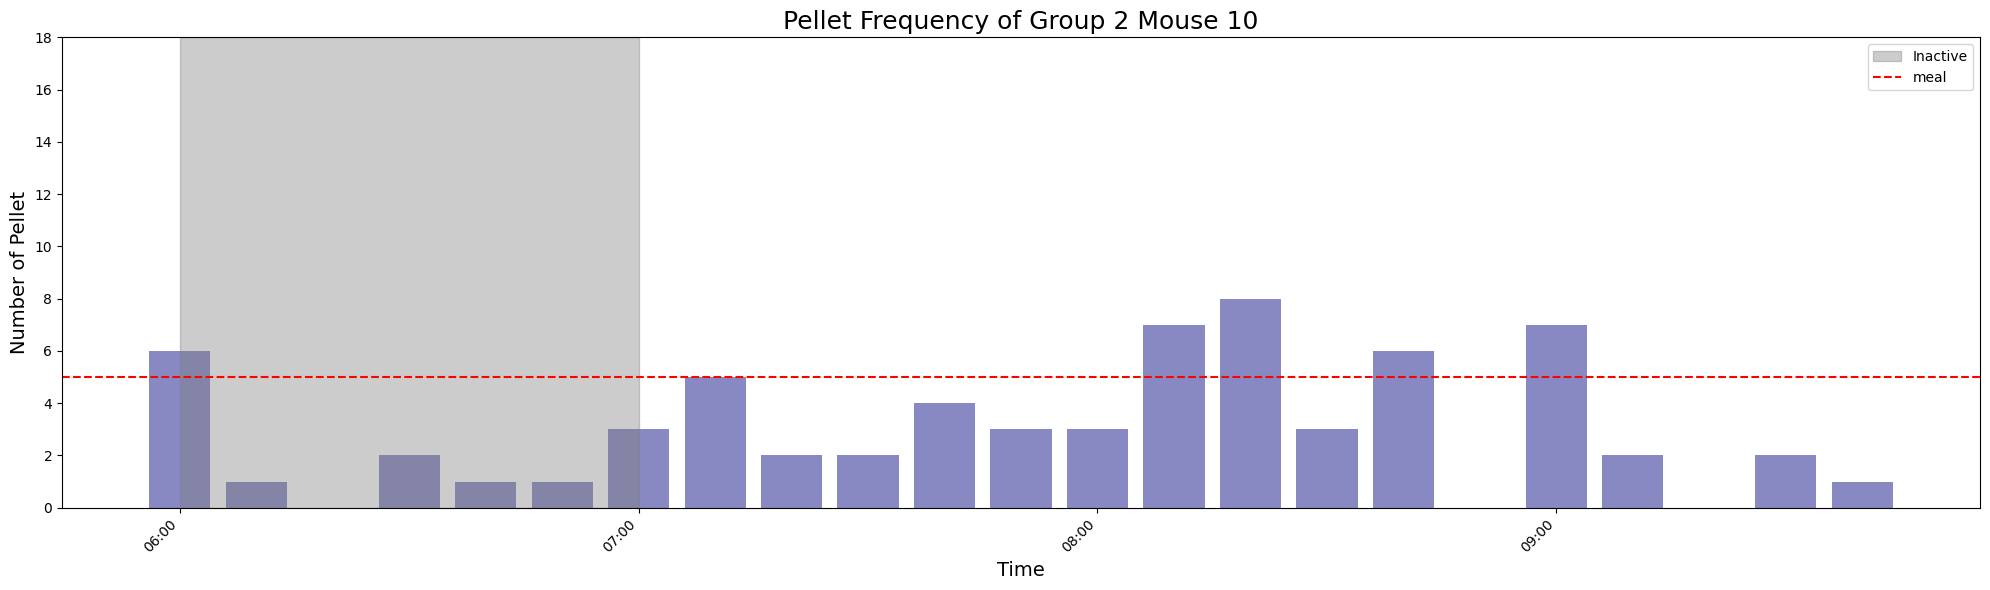

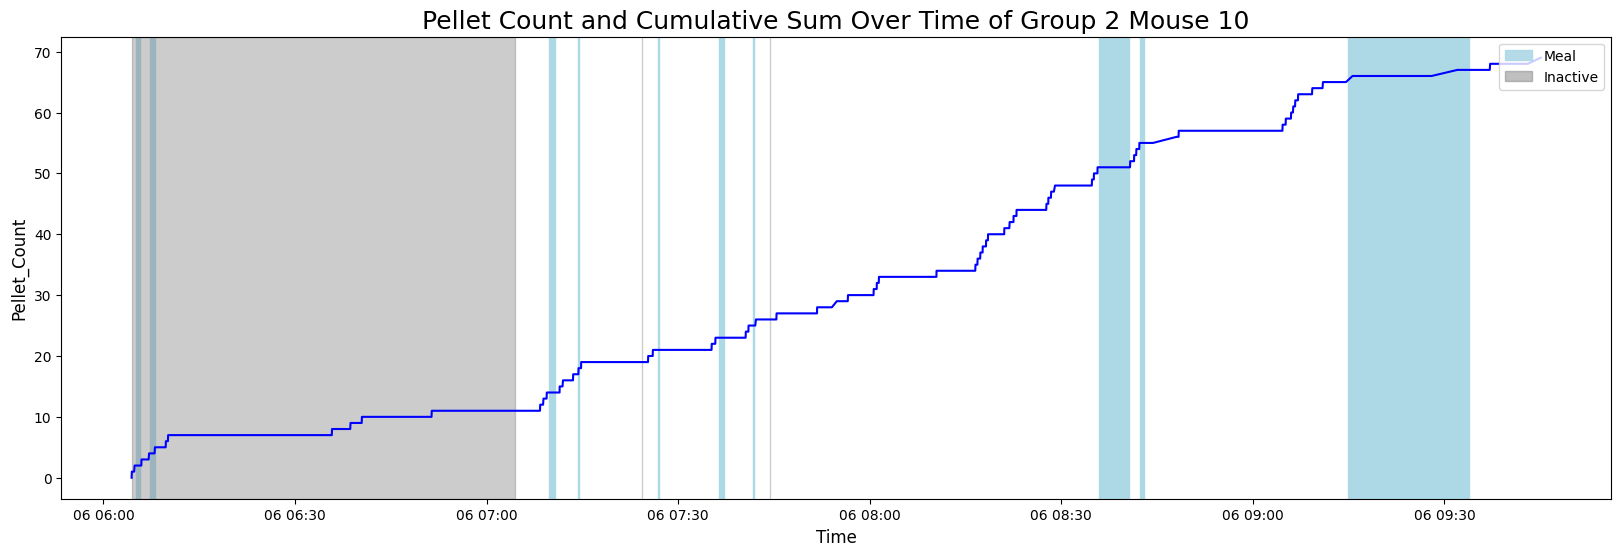

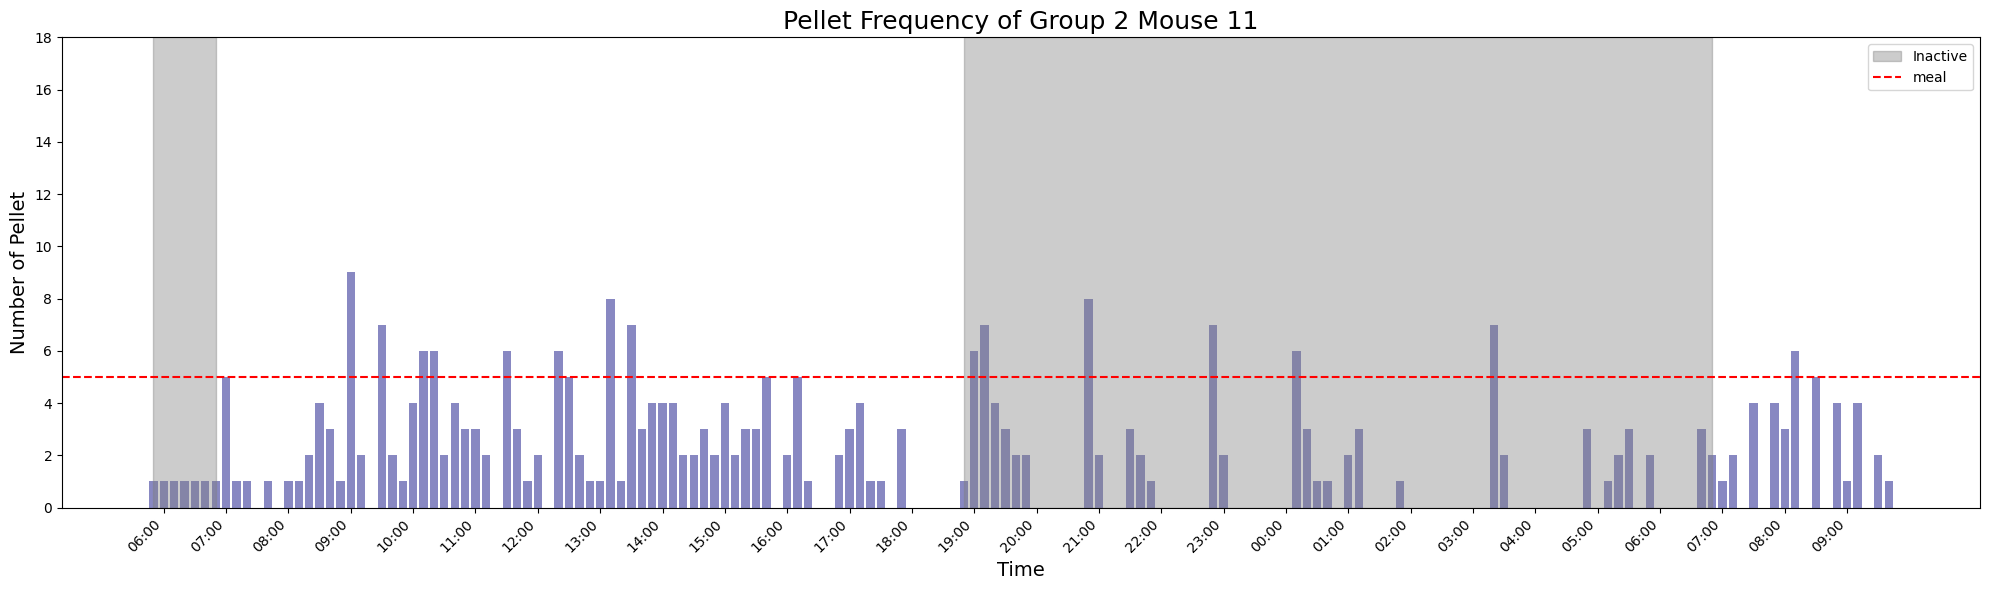

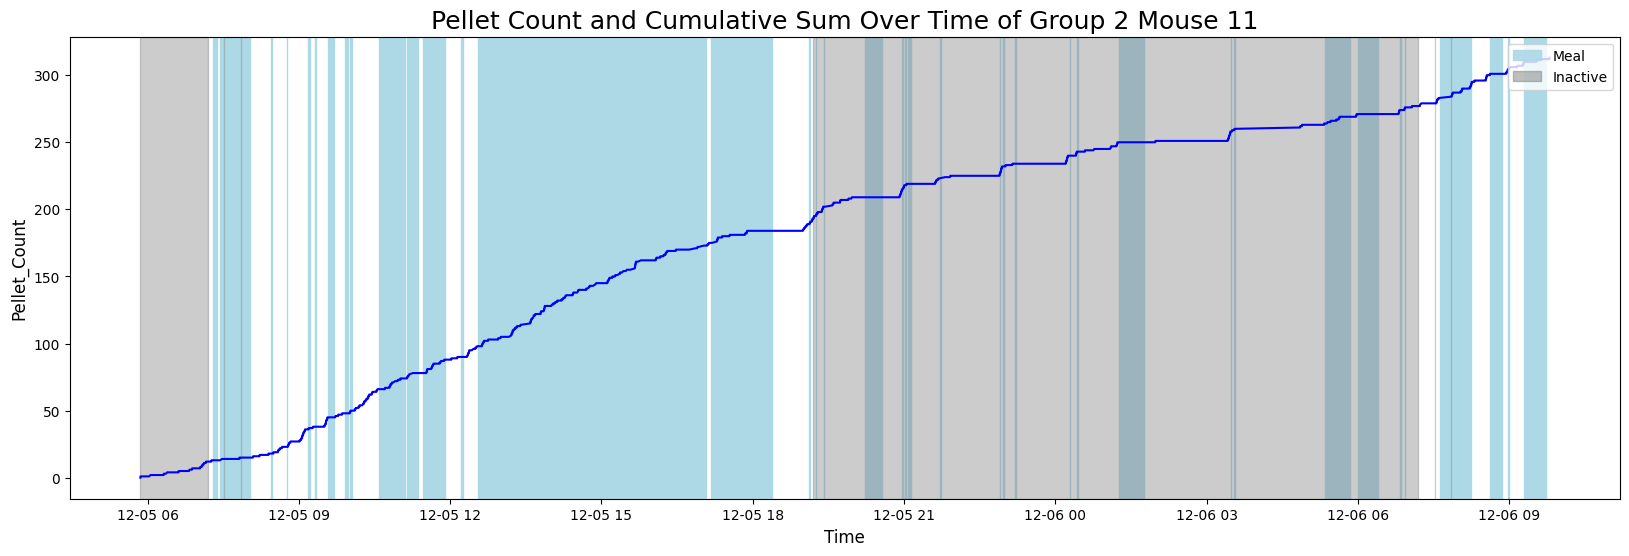

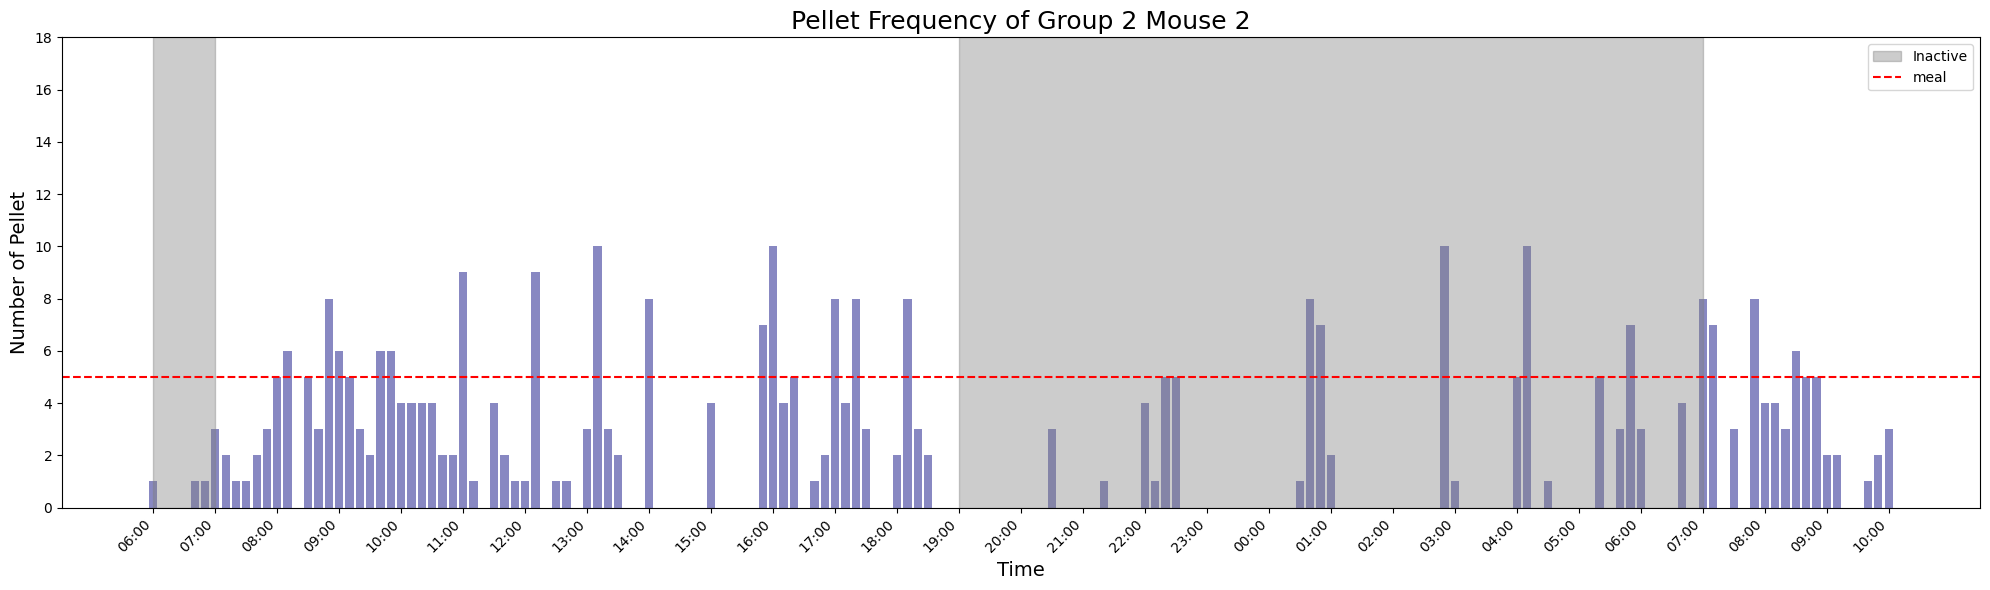

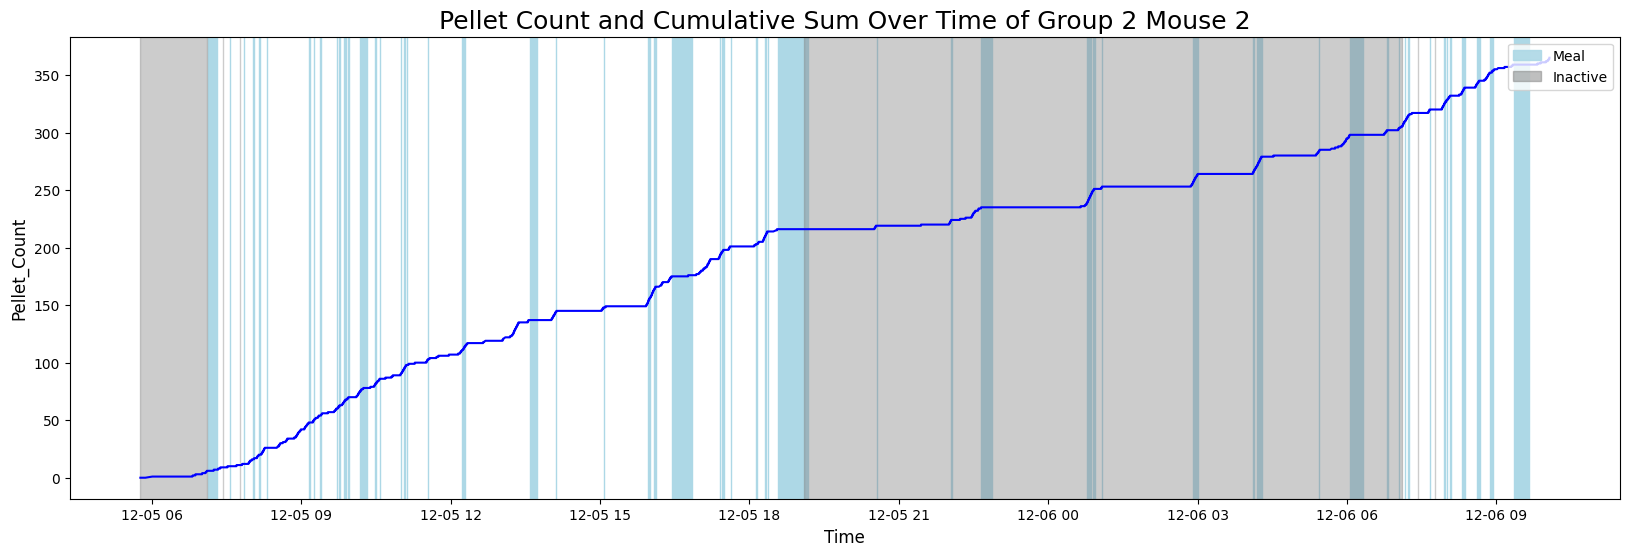

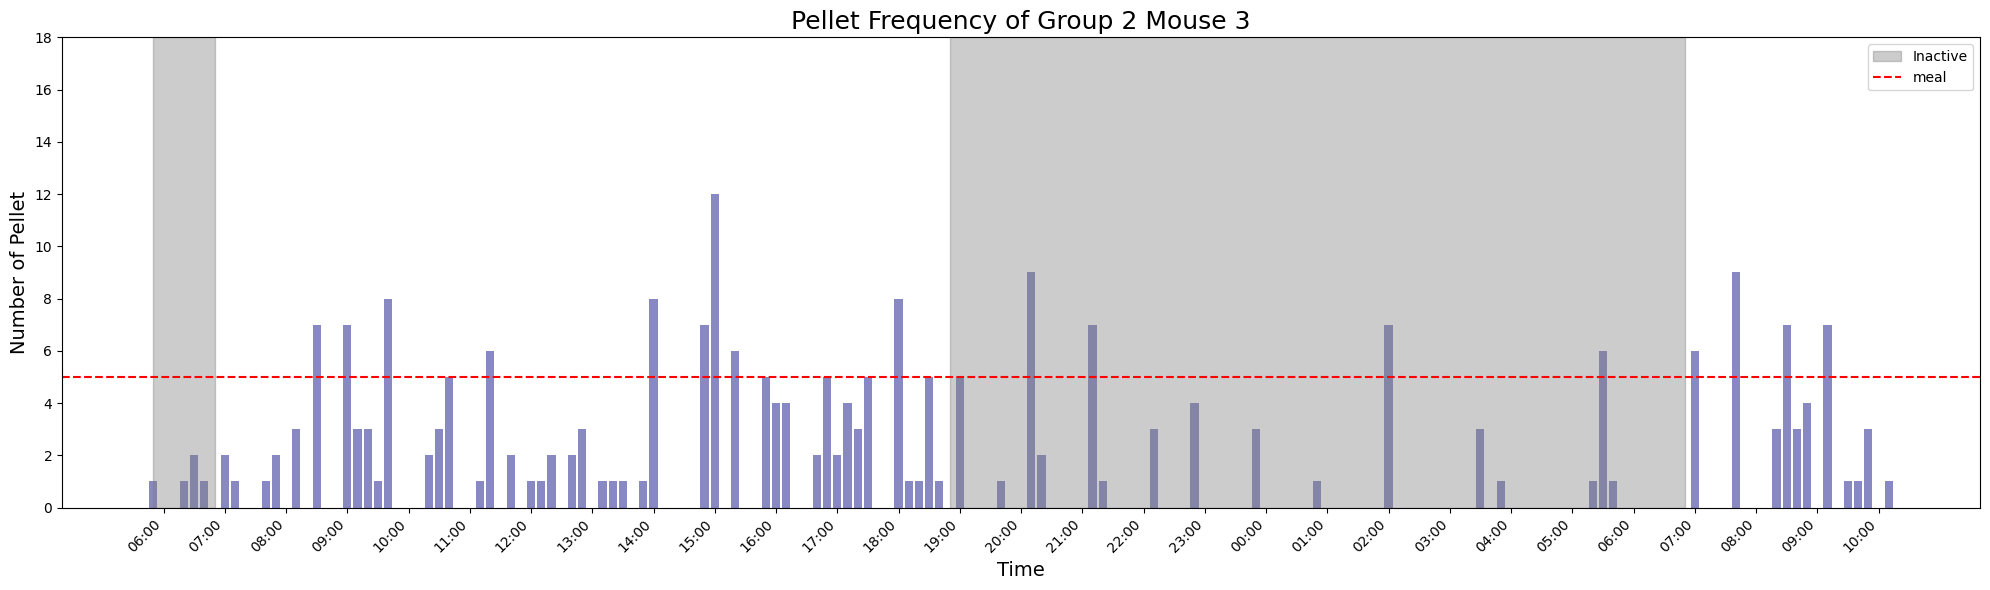

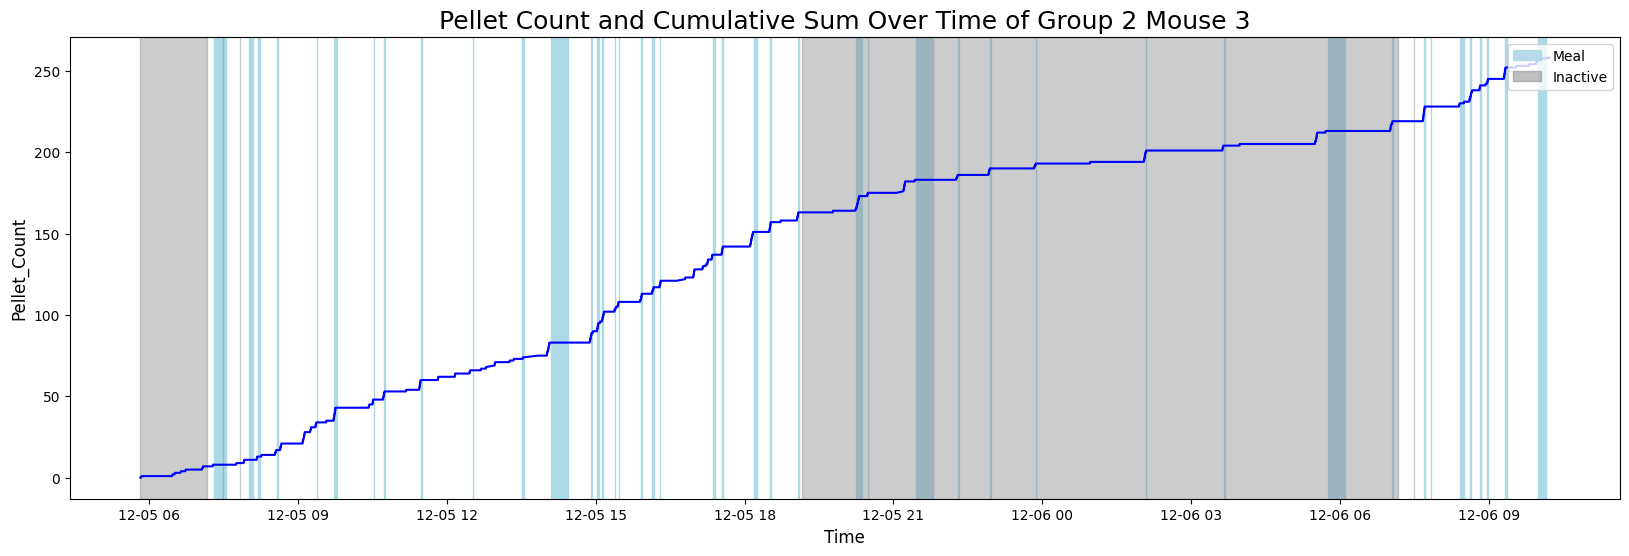

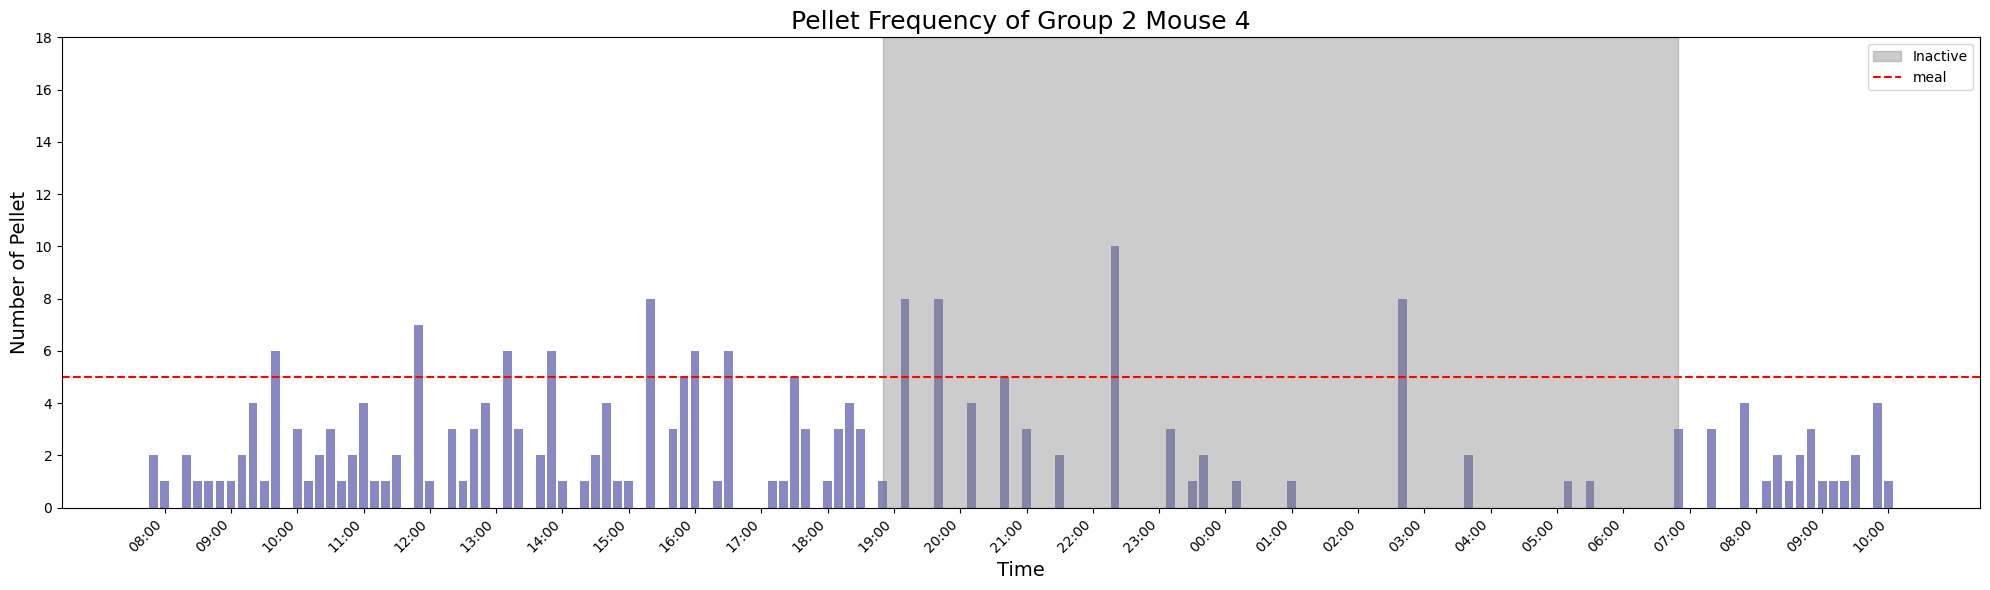

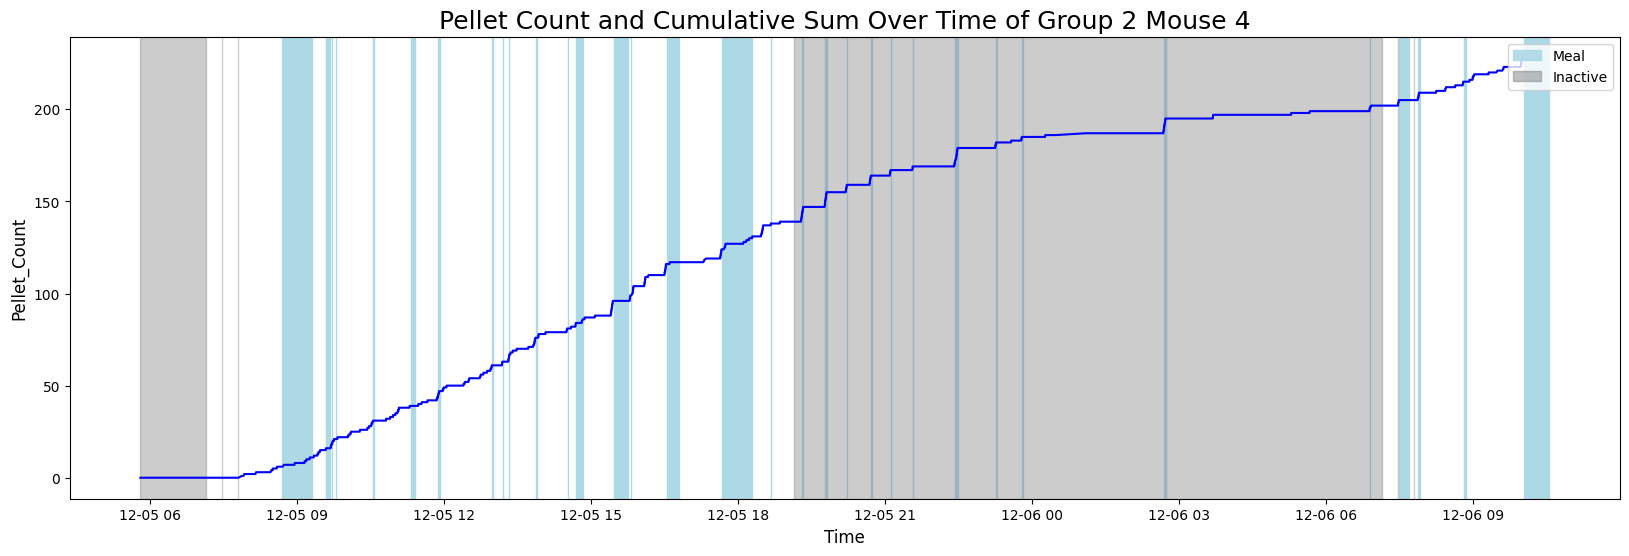

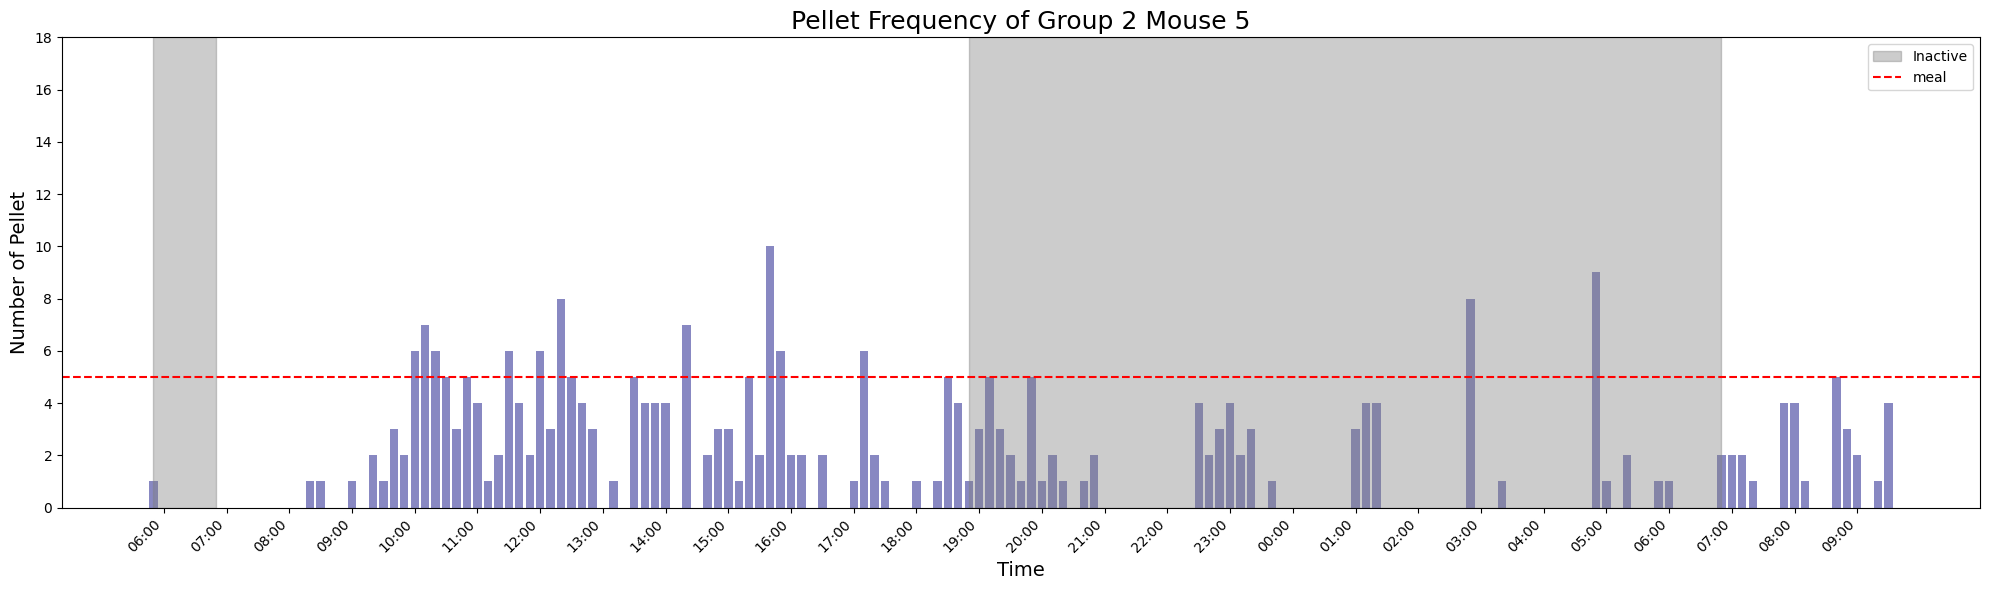

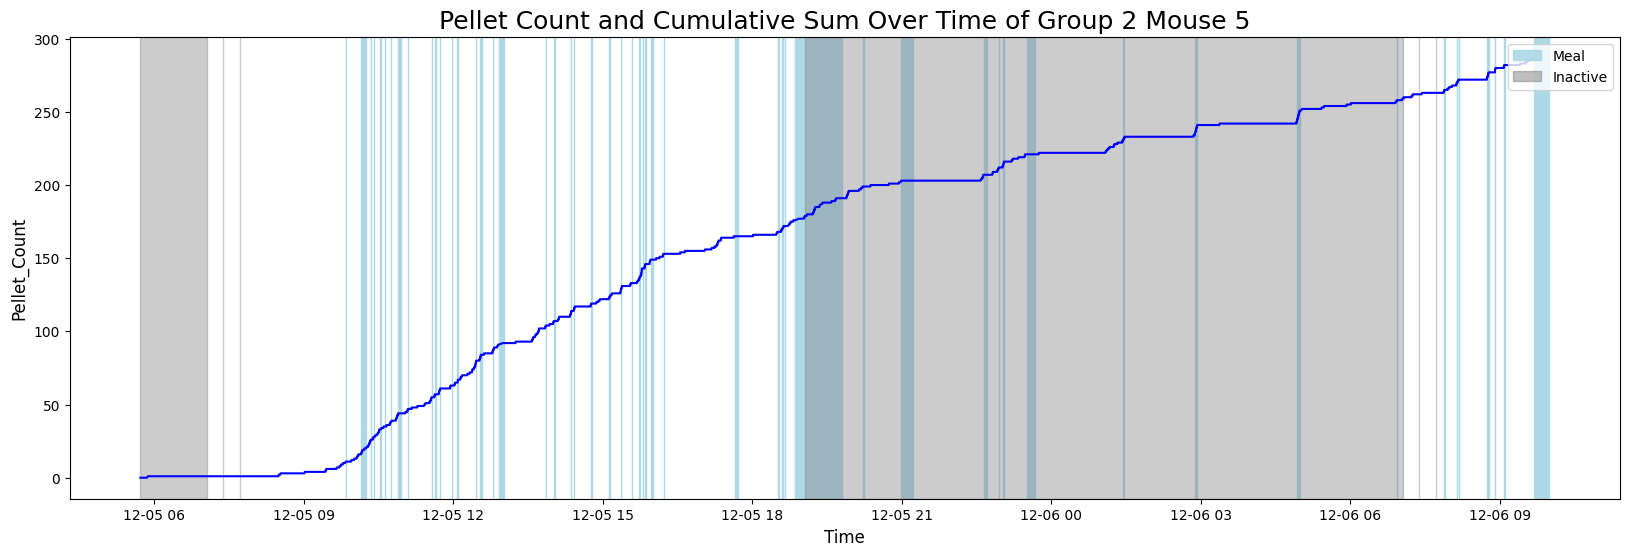

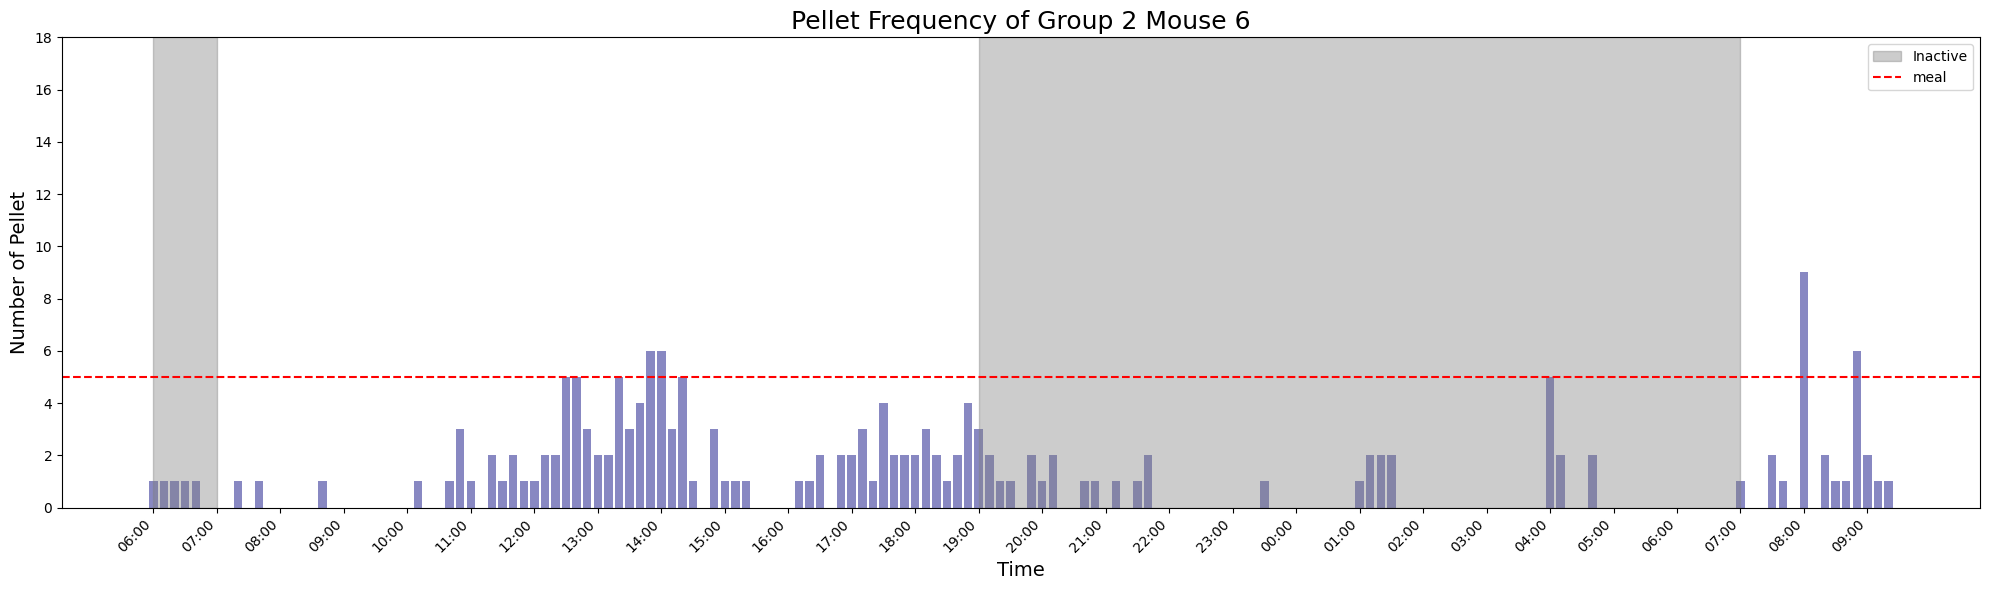

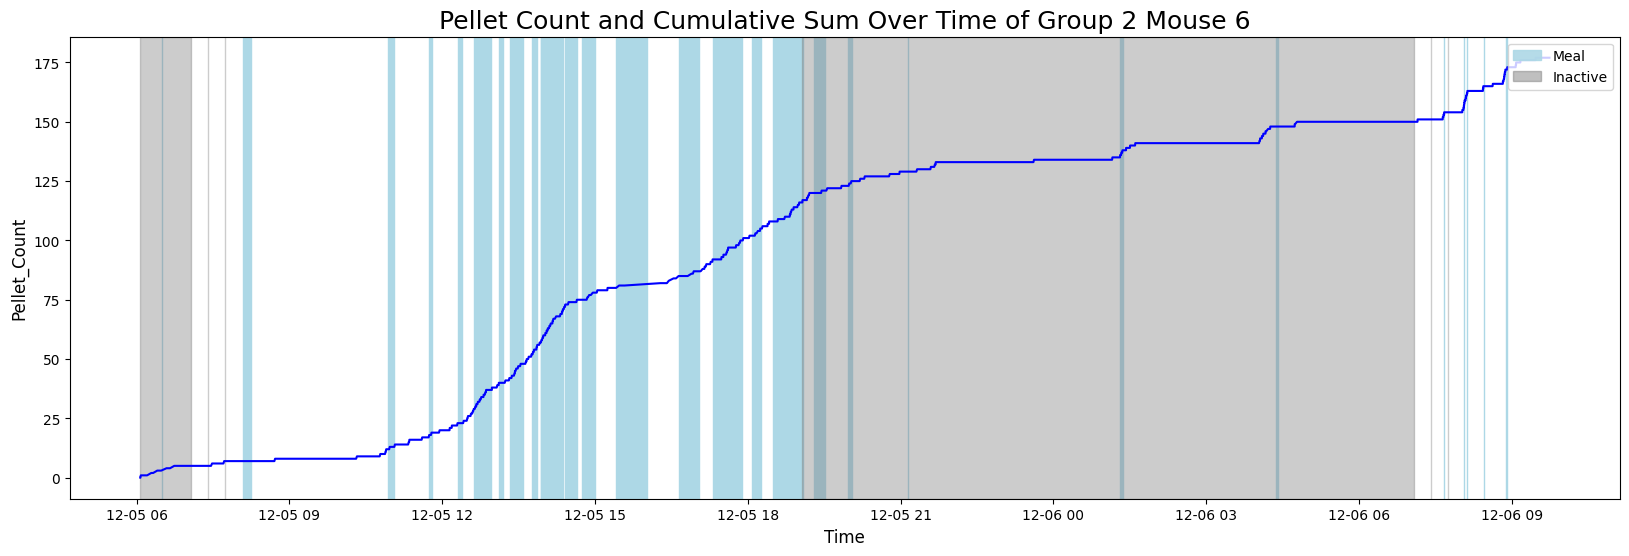

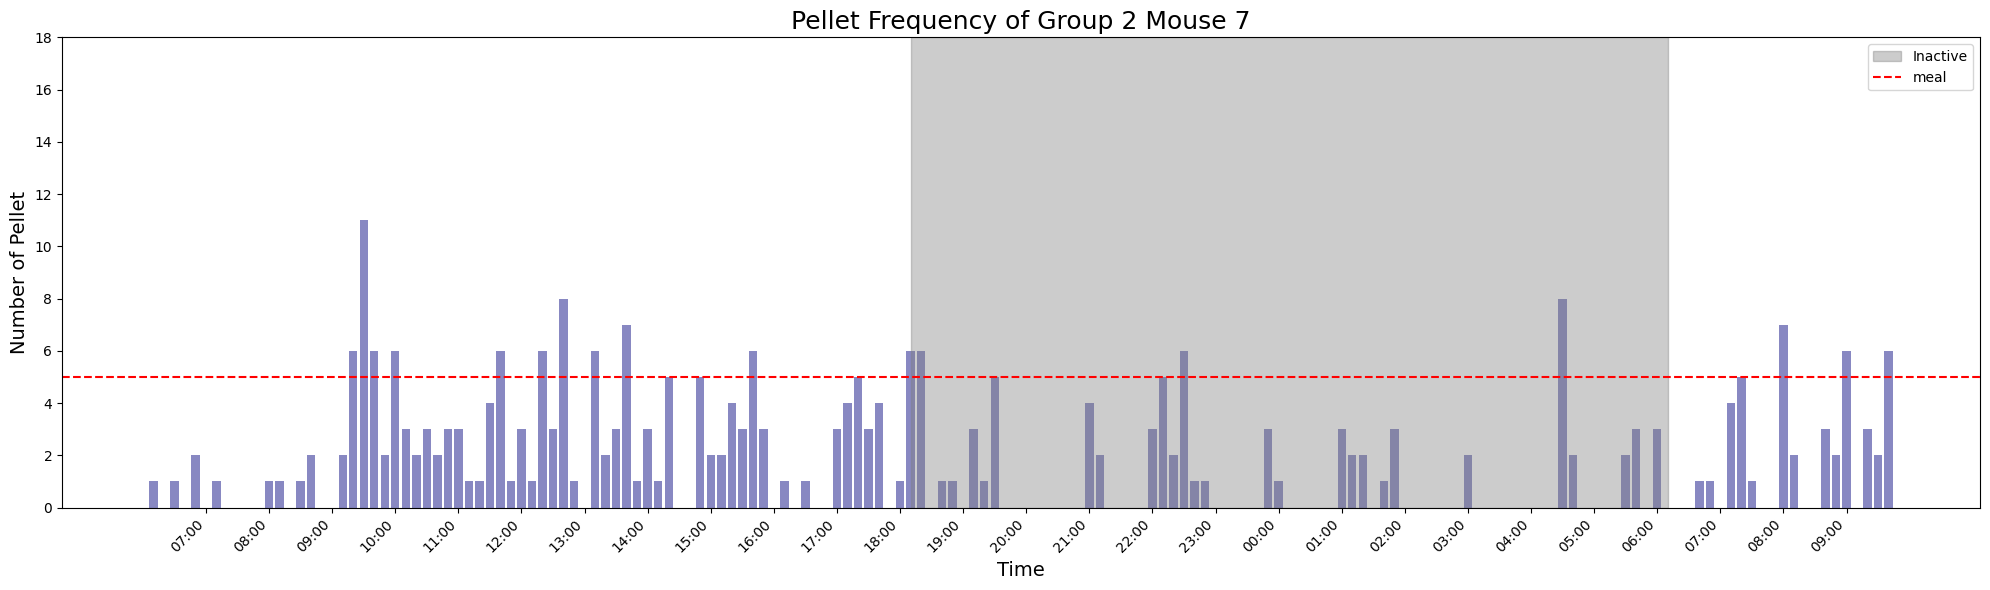

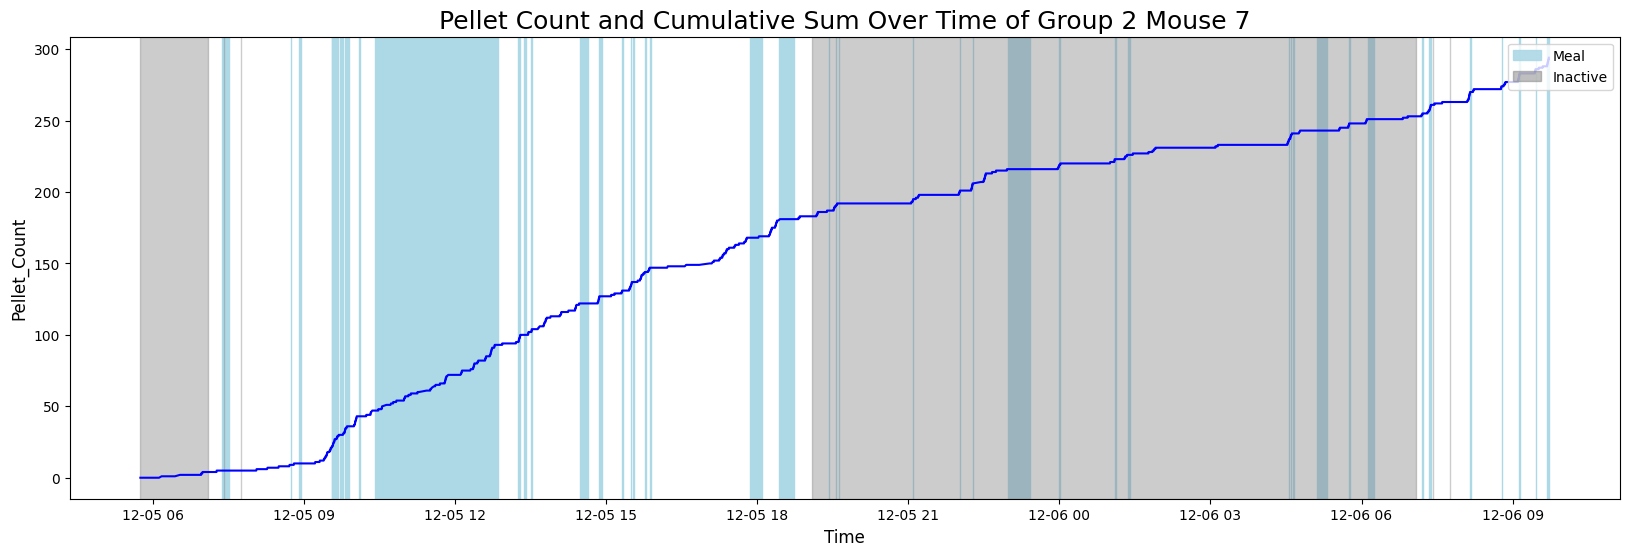

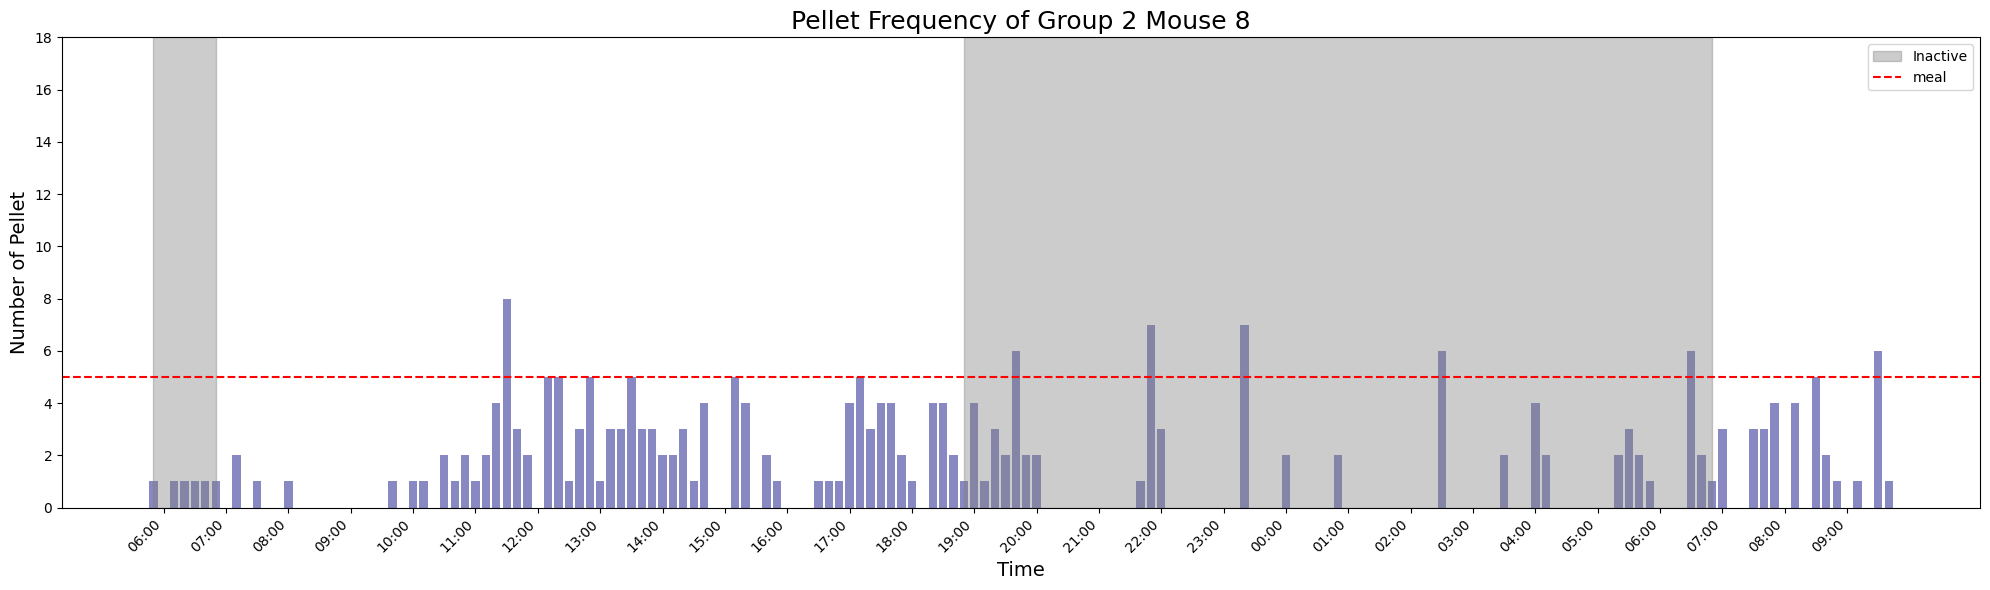

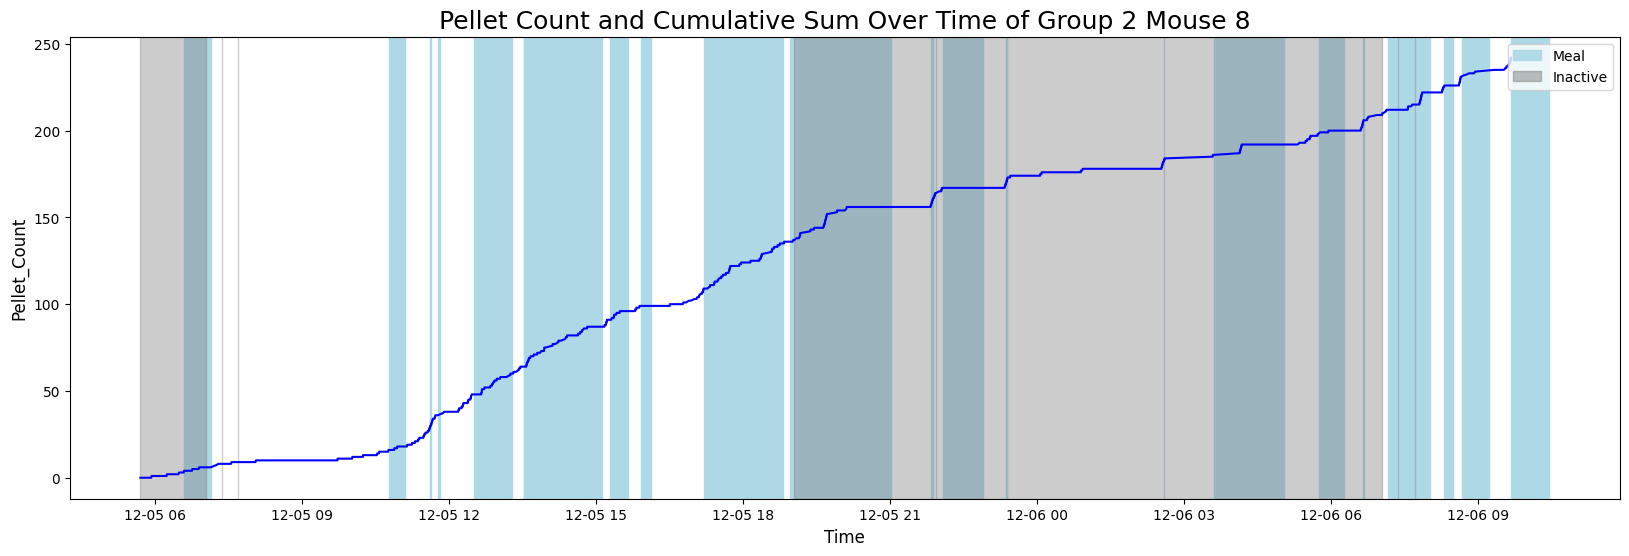

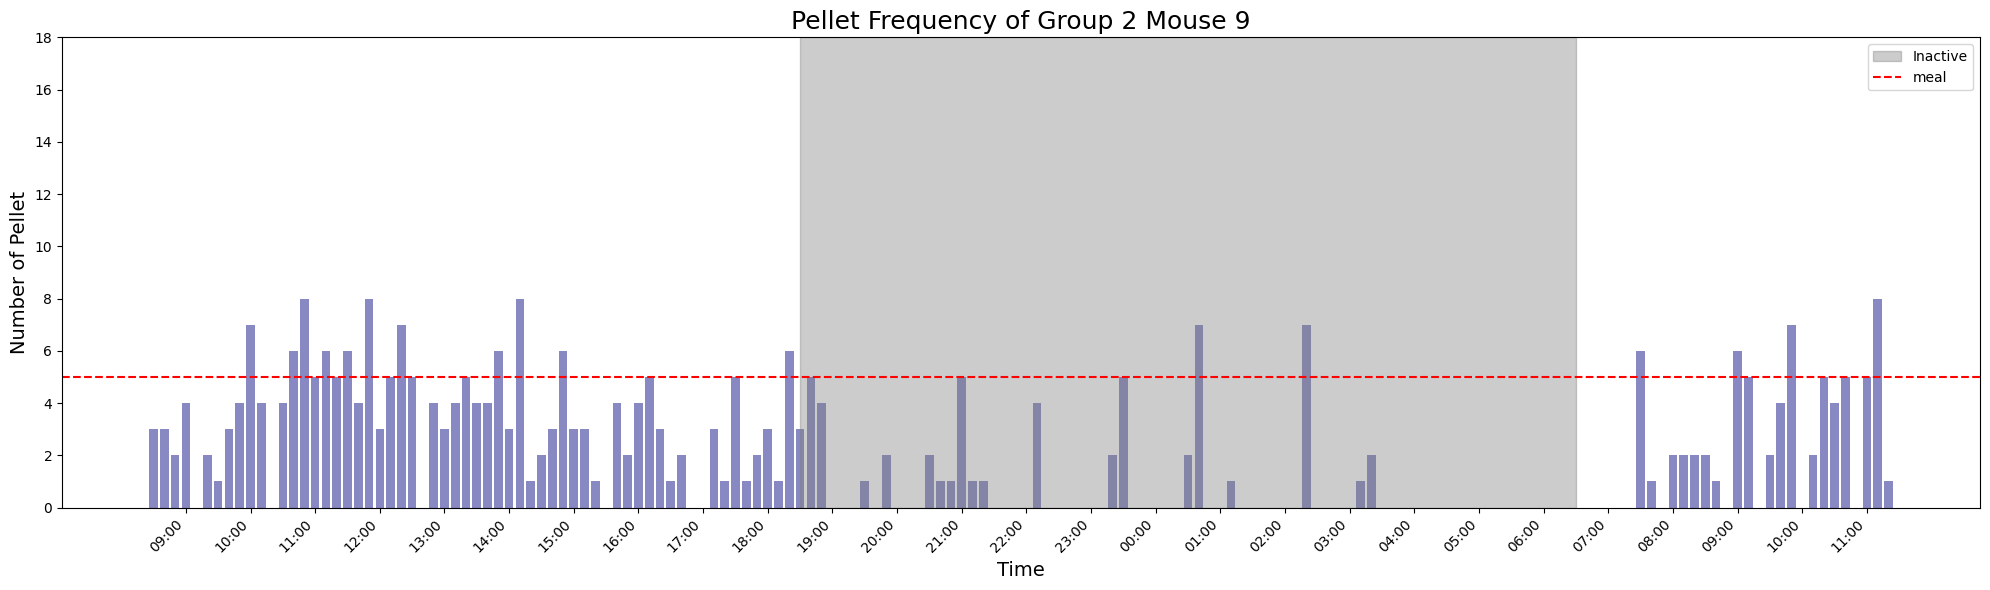

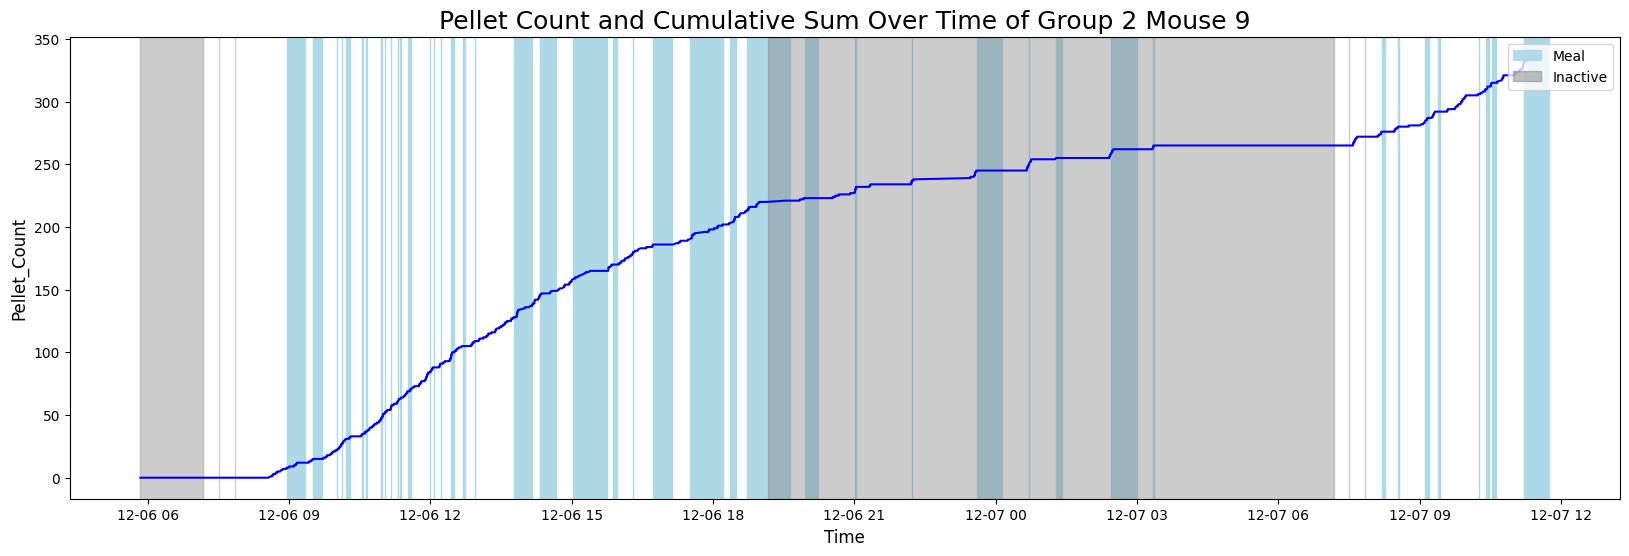

In [2]:
male_avg_pellet = [] # pellet per hour
male_dark_meals = [] # percentage of meals in inactive/dark phase
male_fir_meal = []
male_fir_good_meal = []
flip_male_meal_count = []

for sheet in fr1_male_sheets[:]:
    data = read_excel_by_sheet(sheet=sheet, parent=fr1_male_path)
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    flip_male_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    male_avg_pellet.append(ml.average_pellet(group))
    male_dark_meals.append(ml.active_meal(meal))
    male_fir_meal.append(meal_1)
    male_fir_good_meal.append(meal_1_good)
    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, f'pellet_freq_{sheet}'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, f'pellet_curve_{sheet}.svg'))

## CASK Group

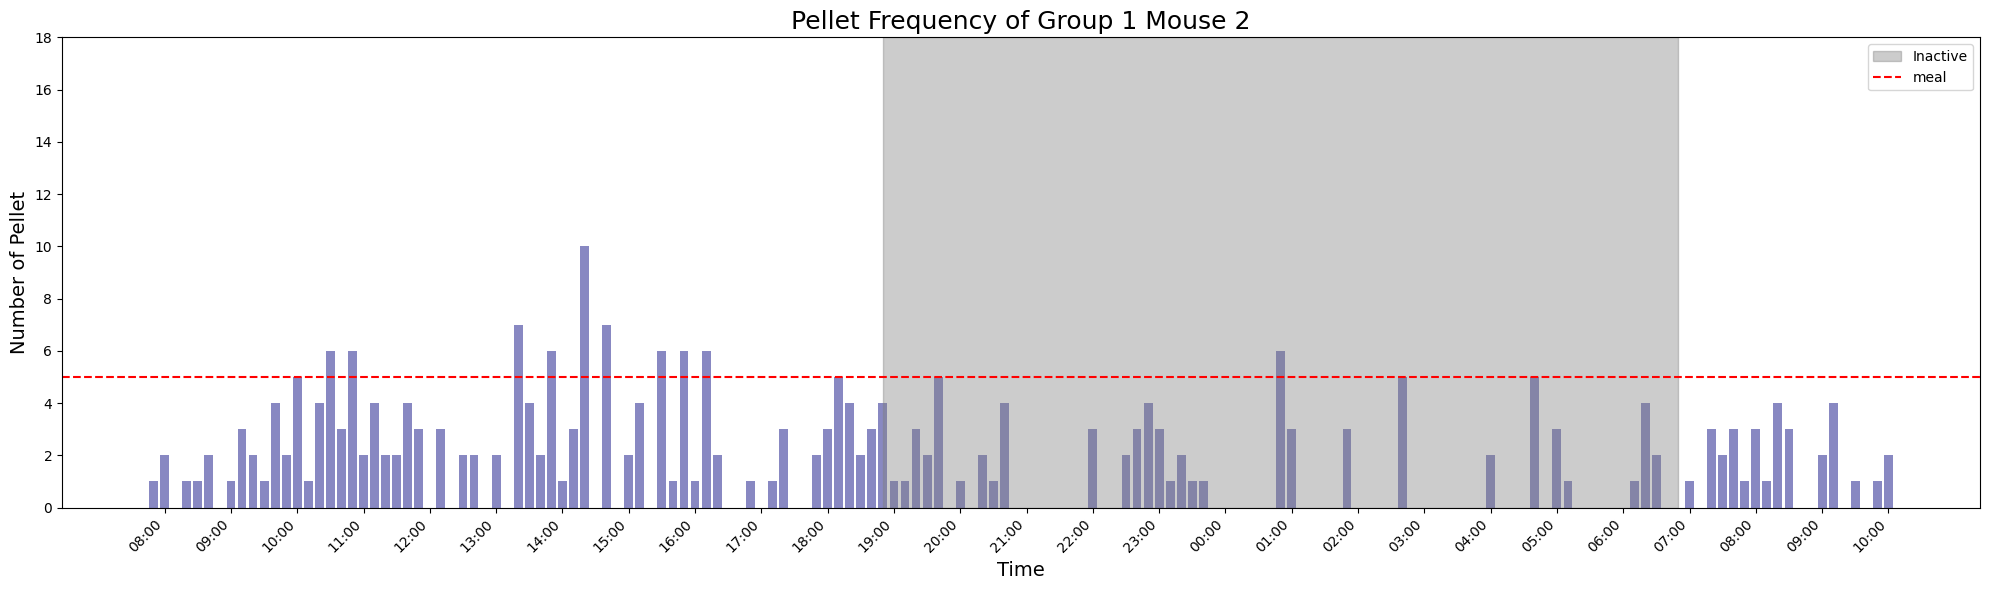

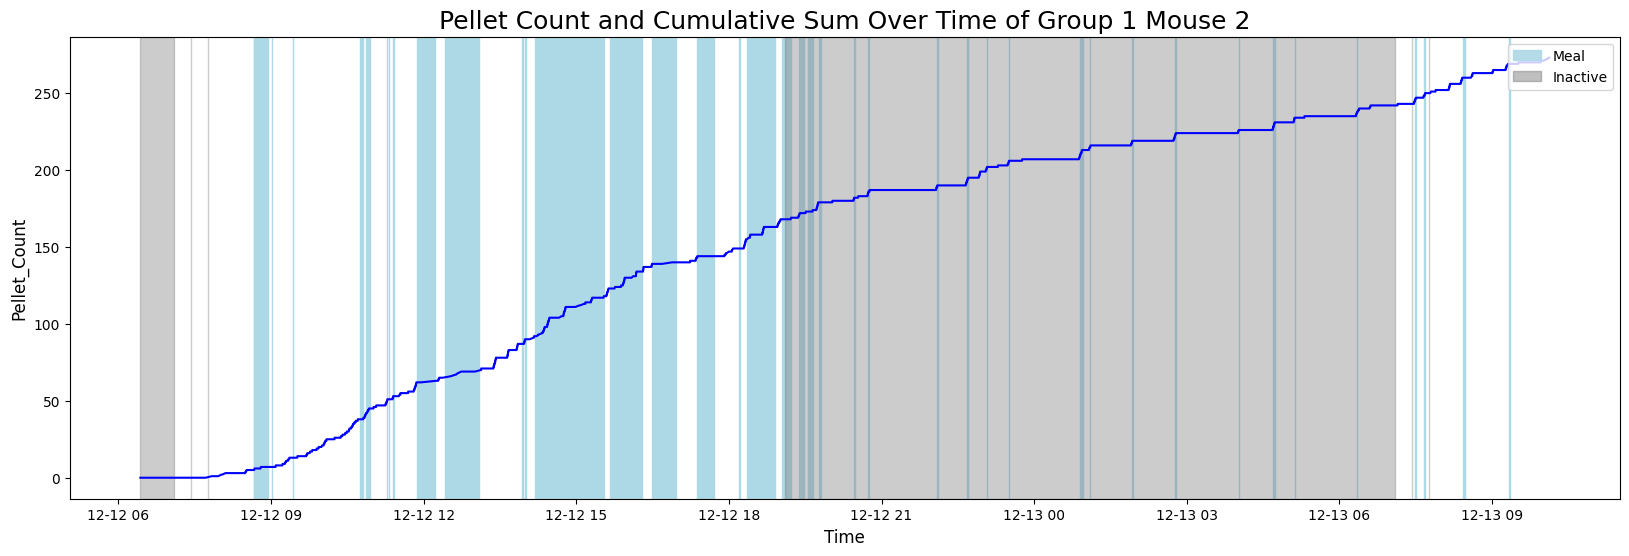

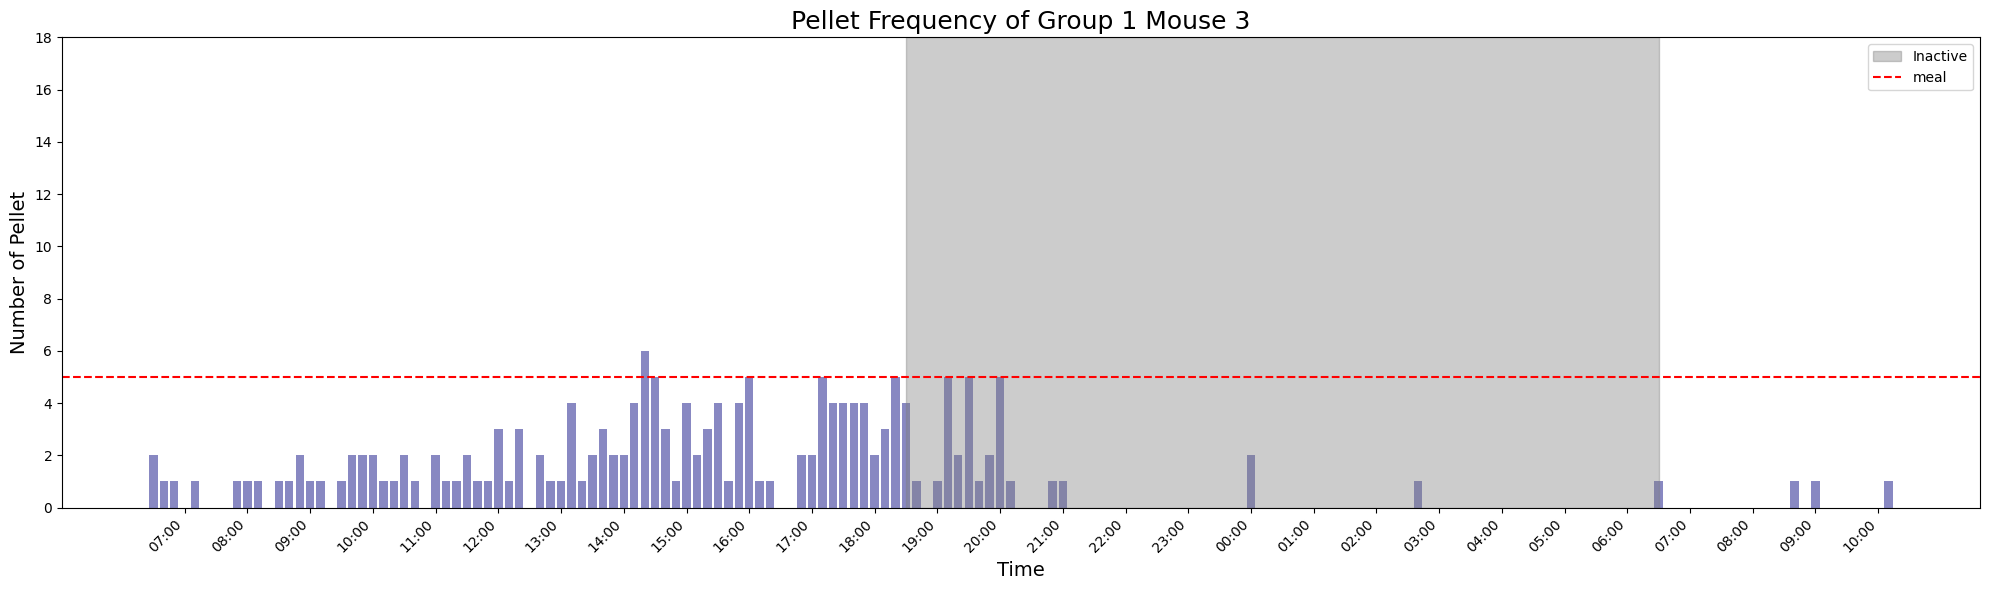

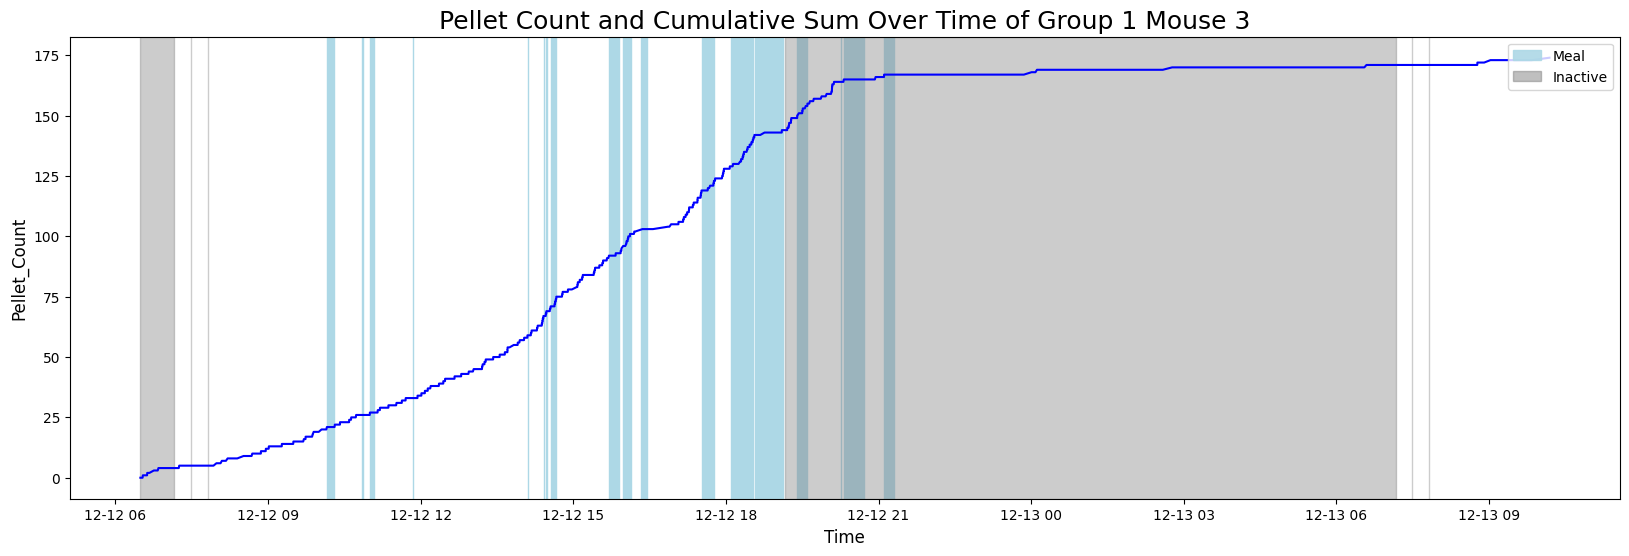

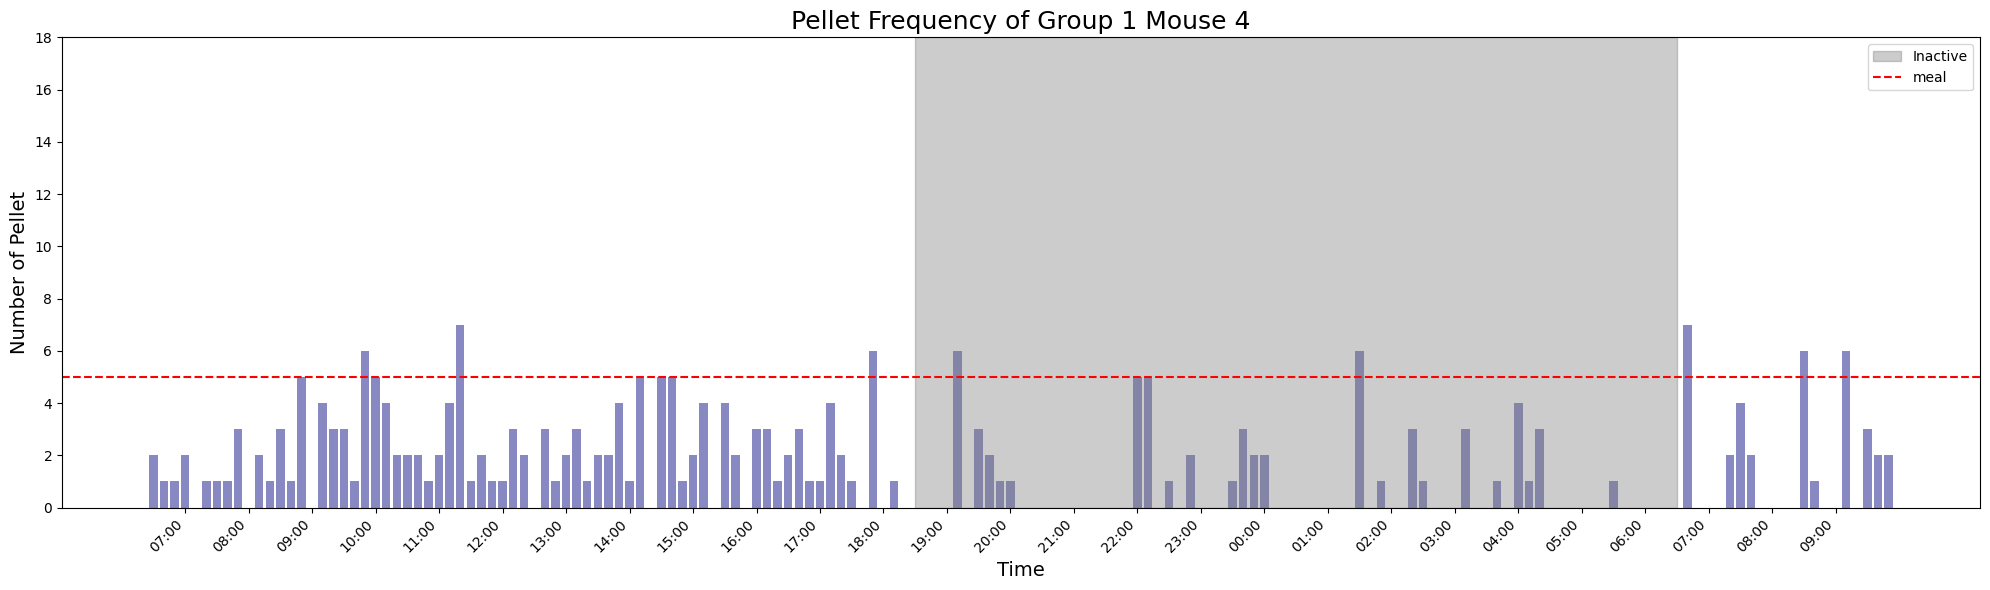

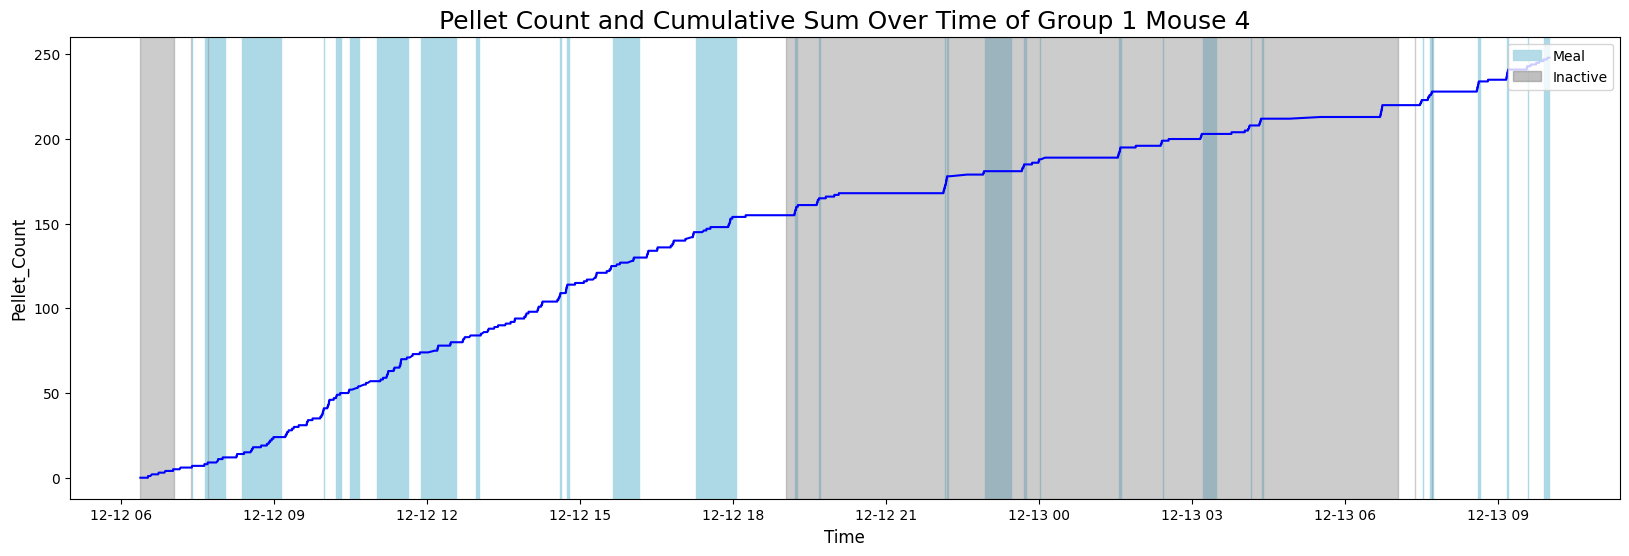

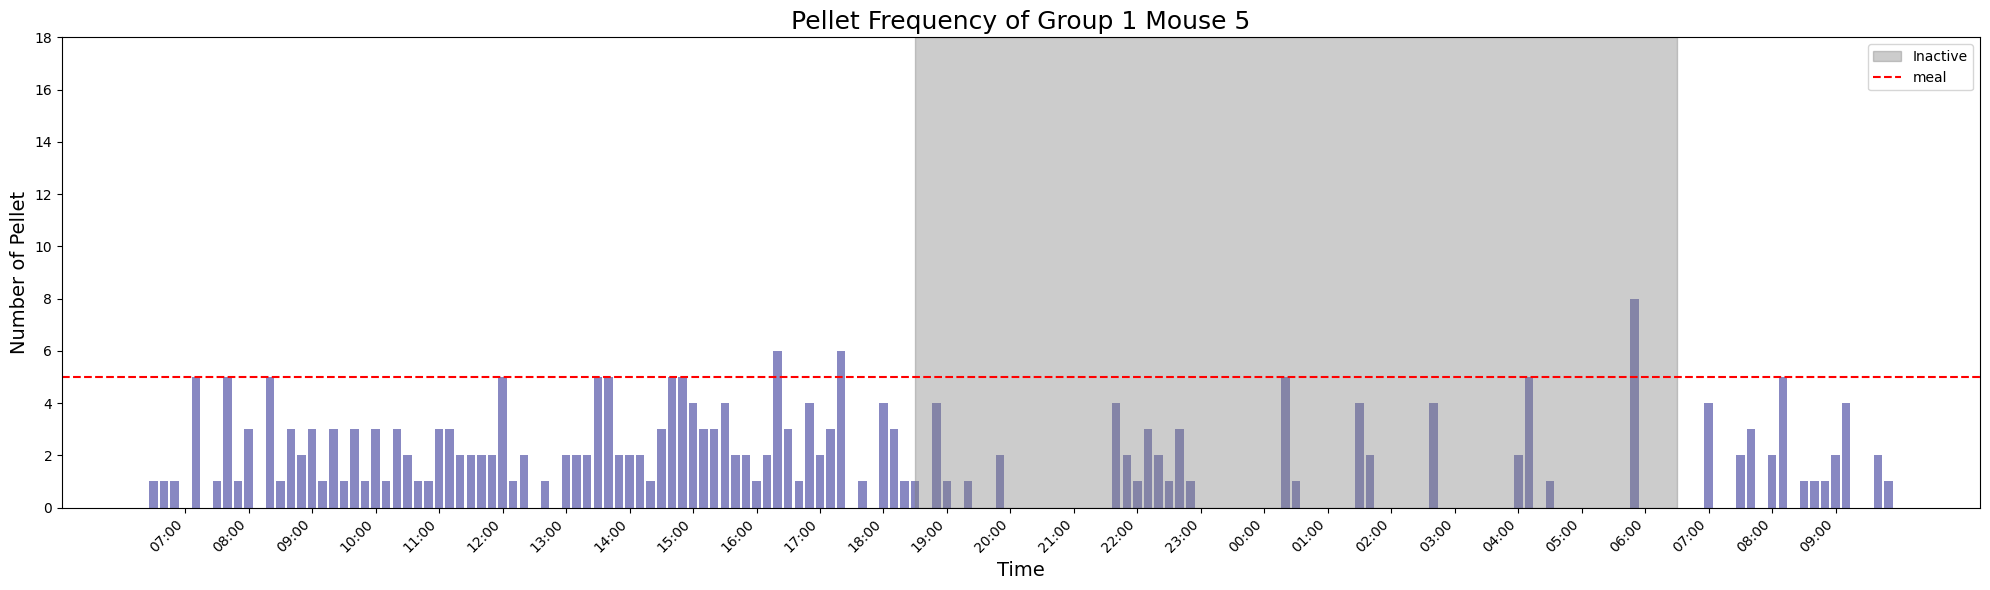

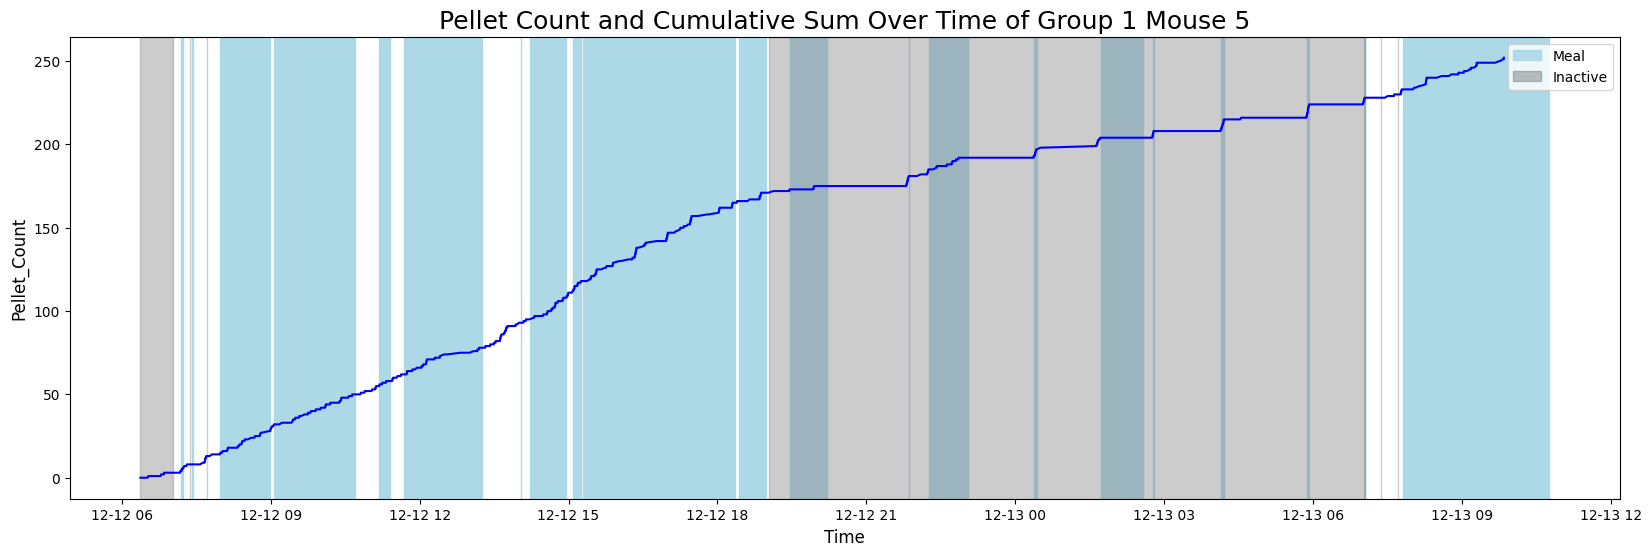

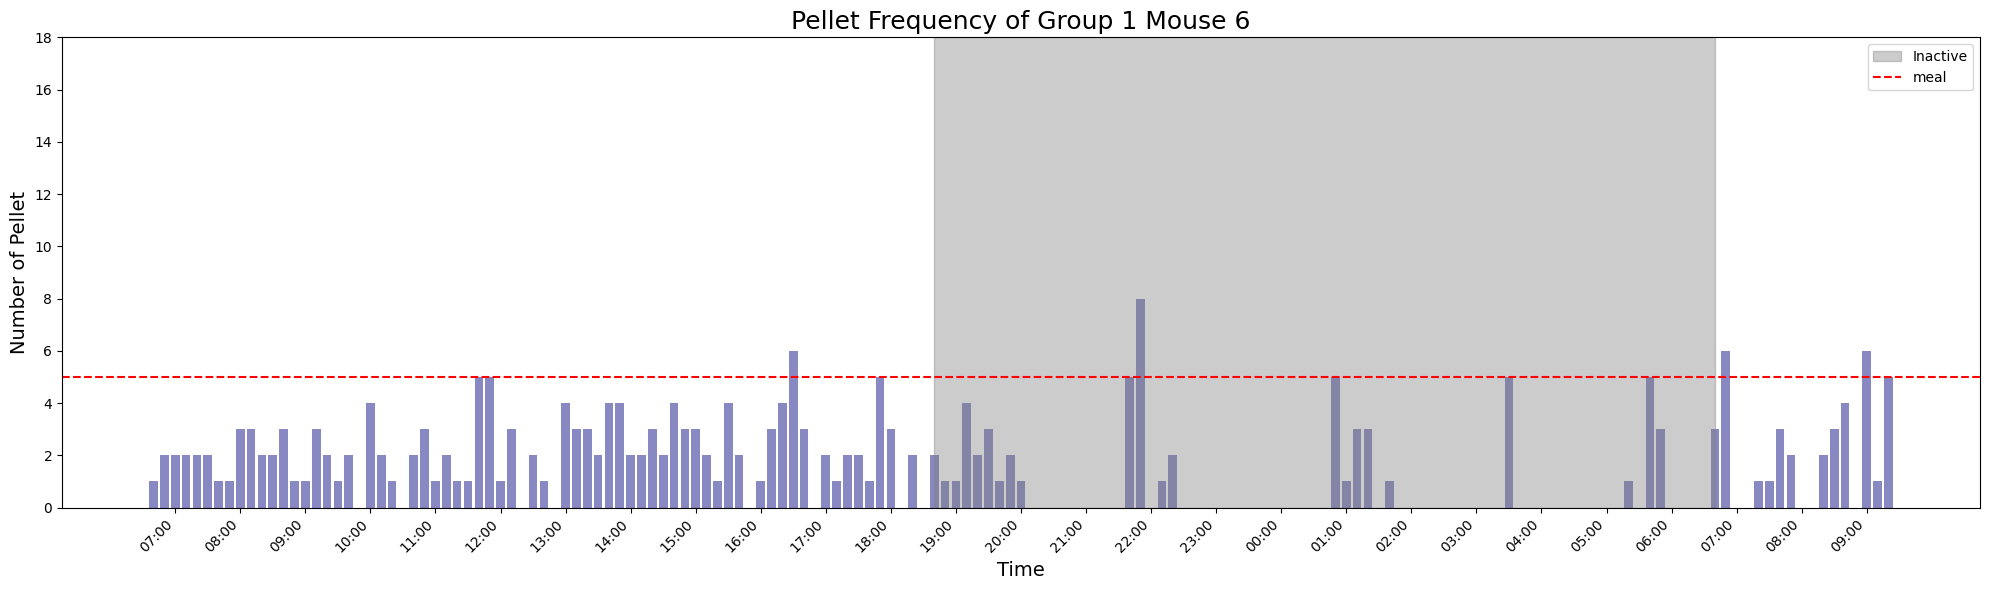

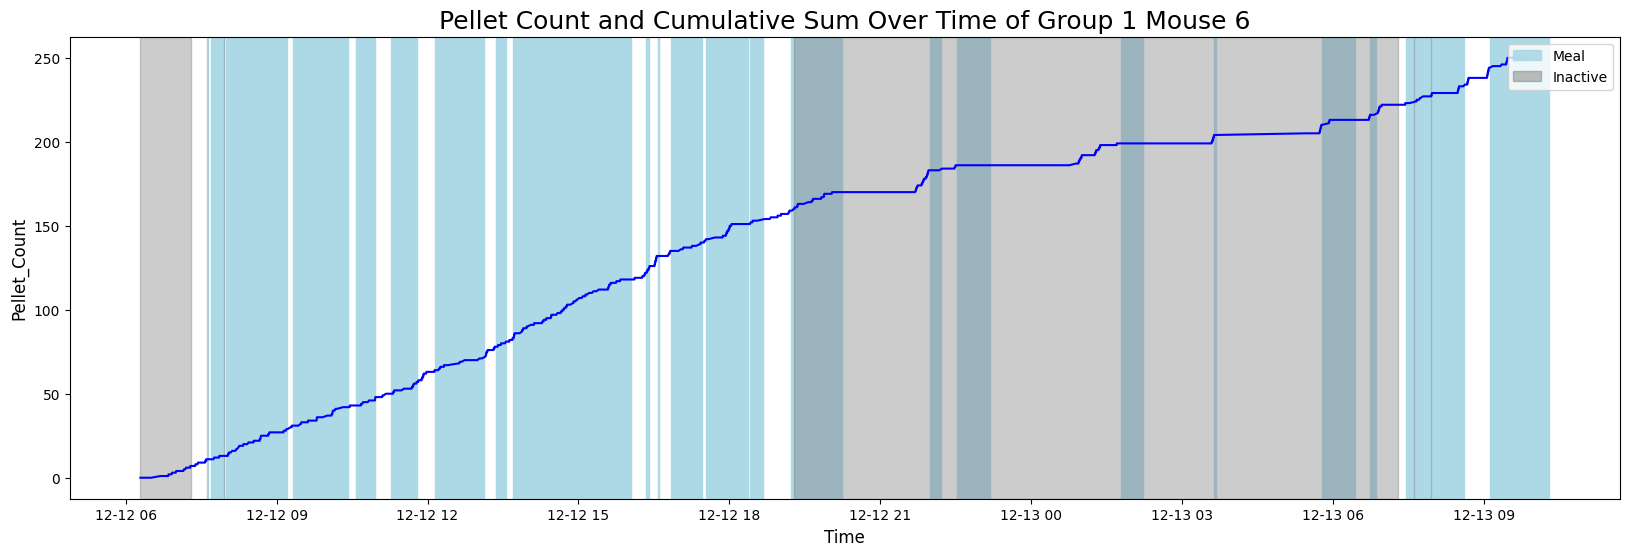

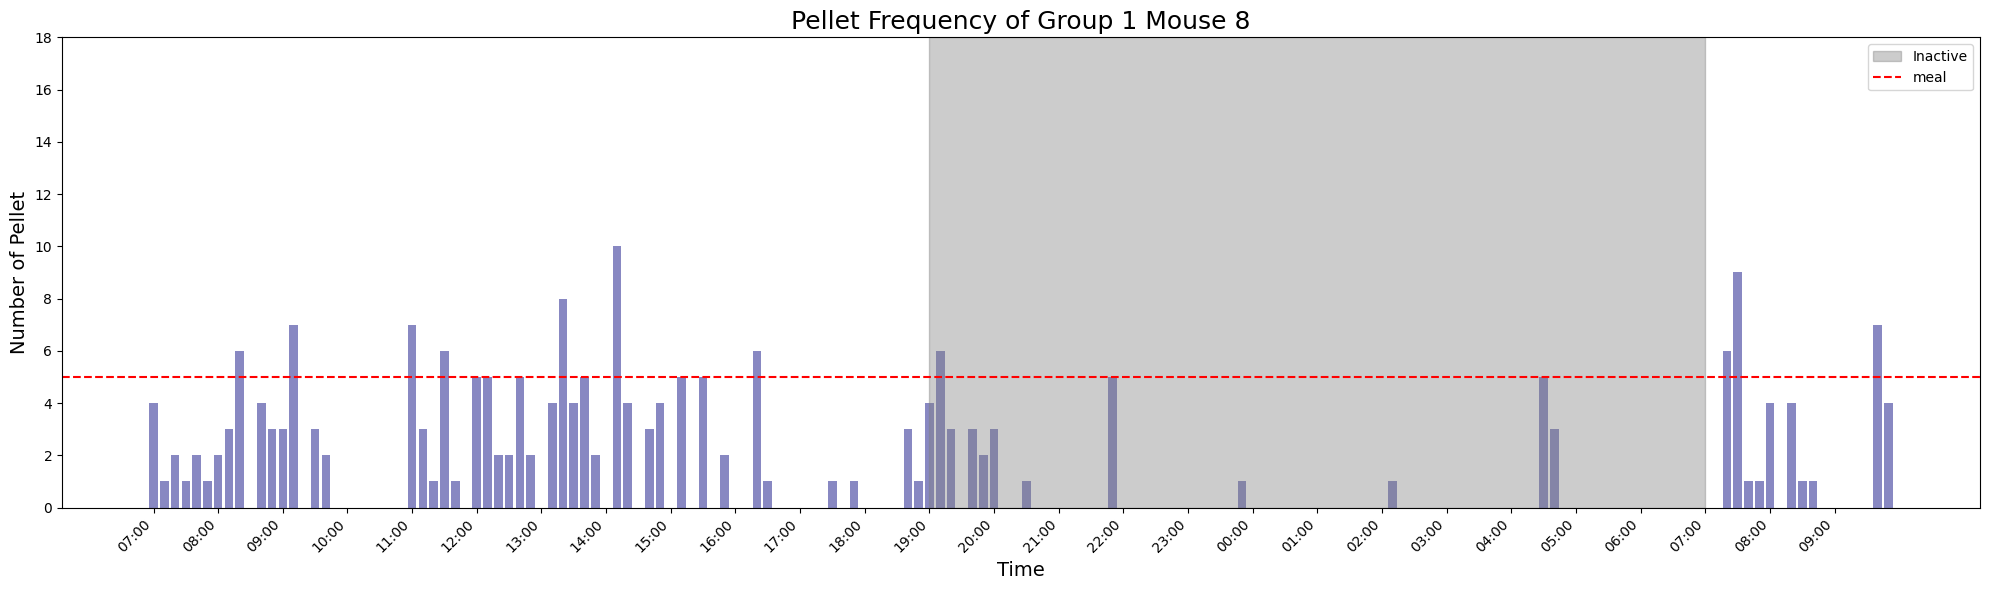

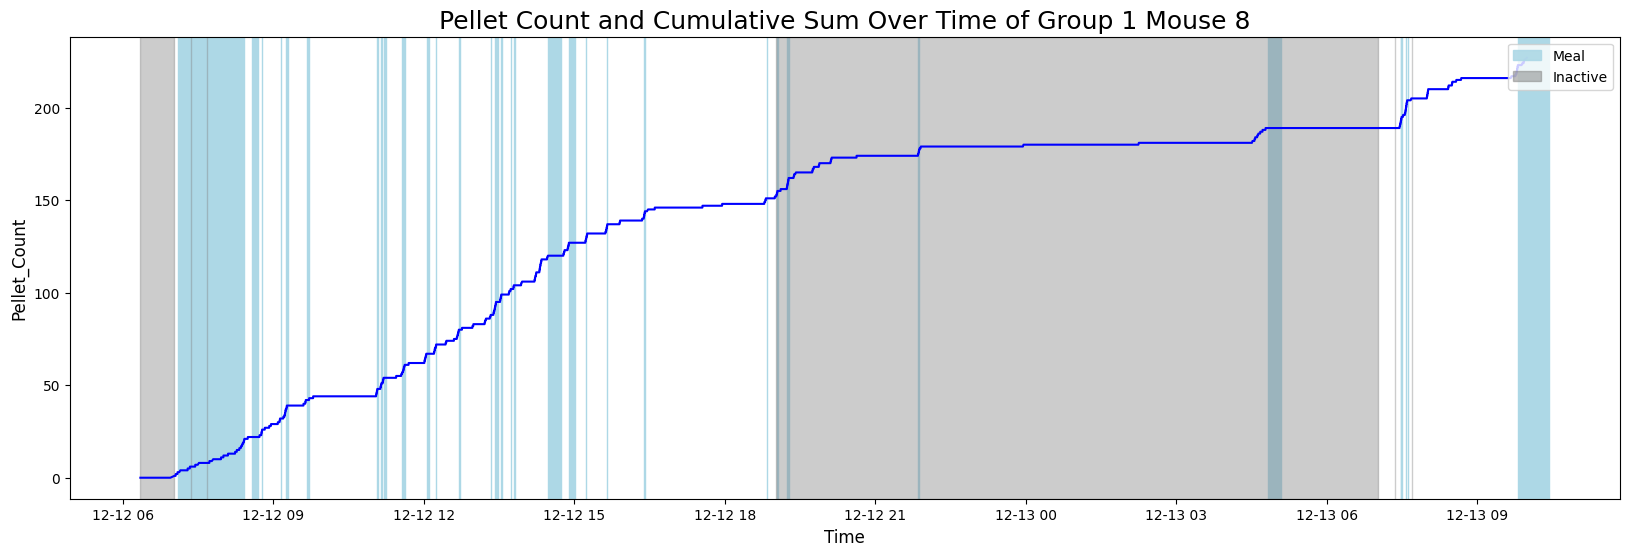

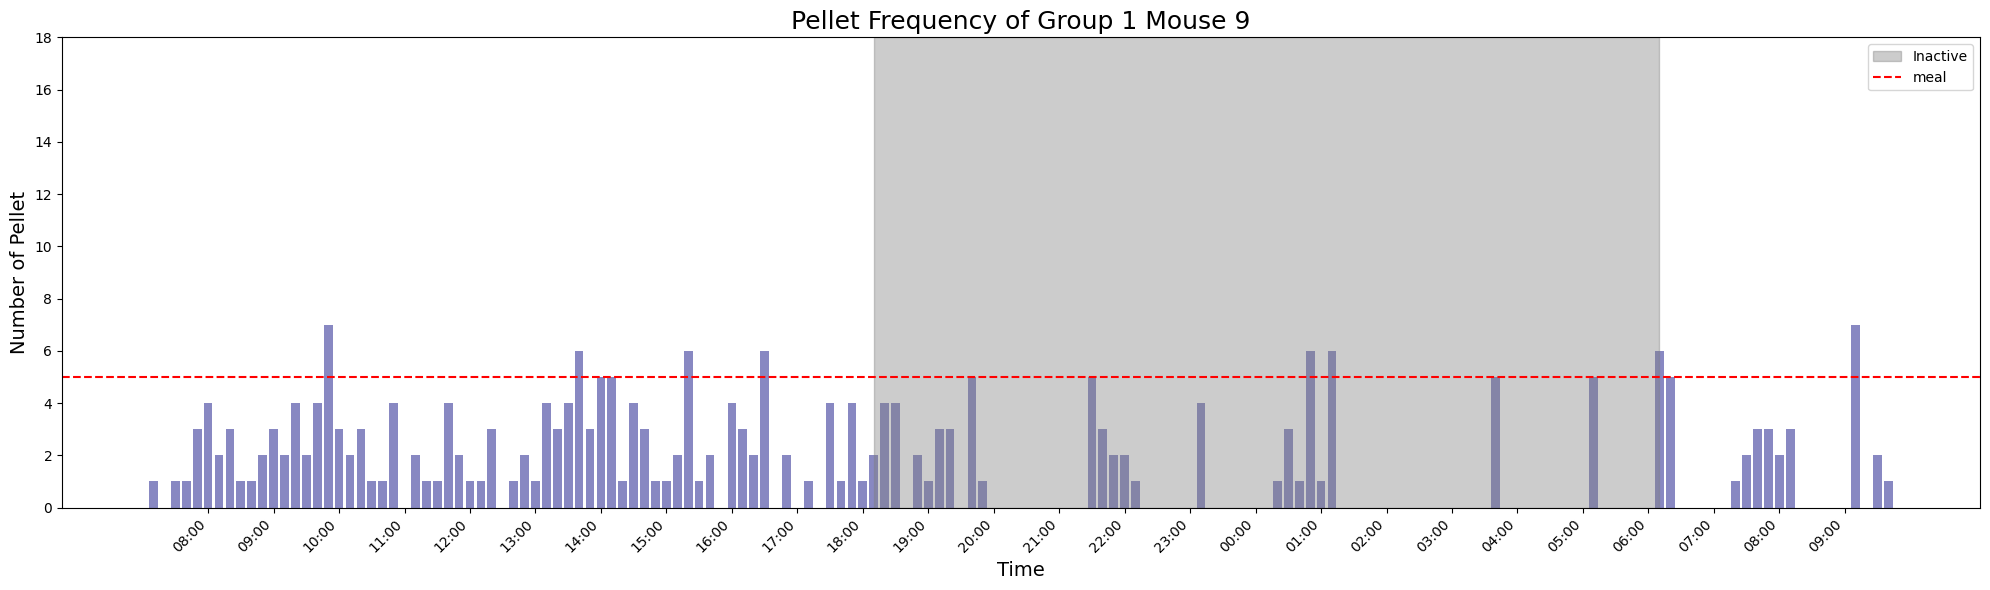

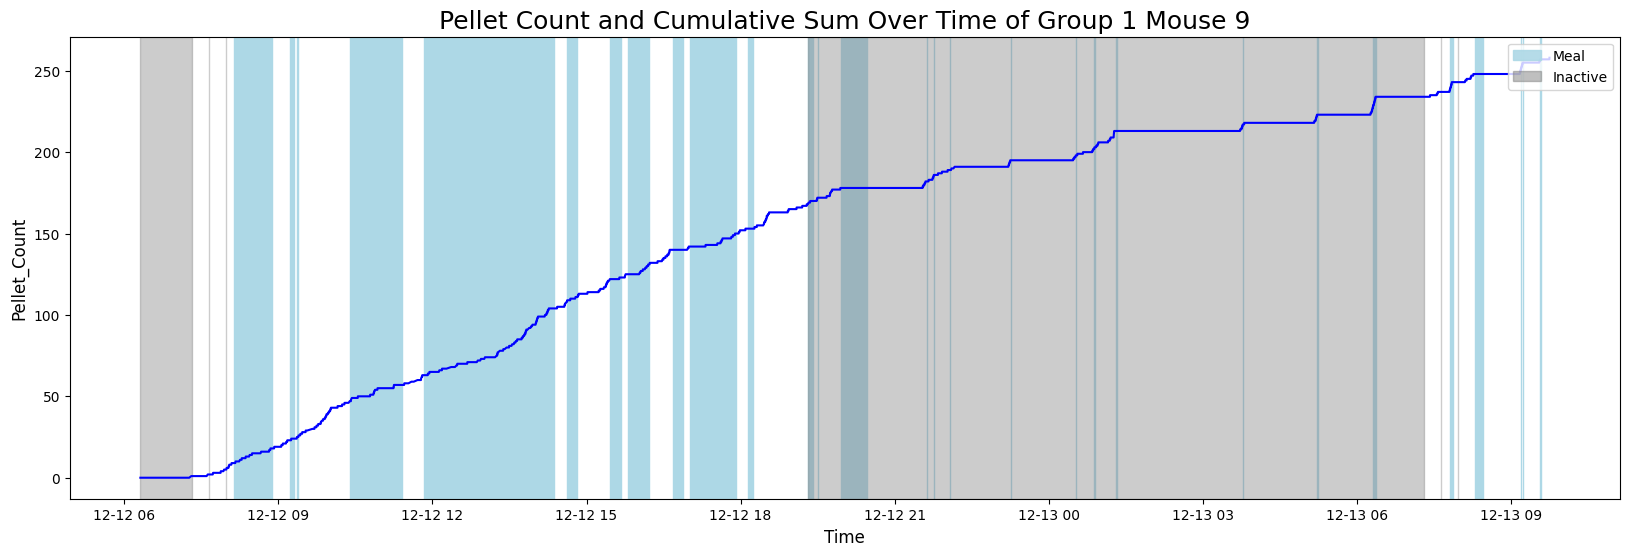

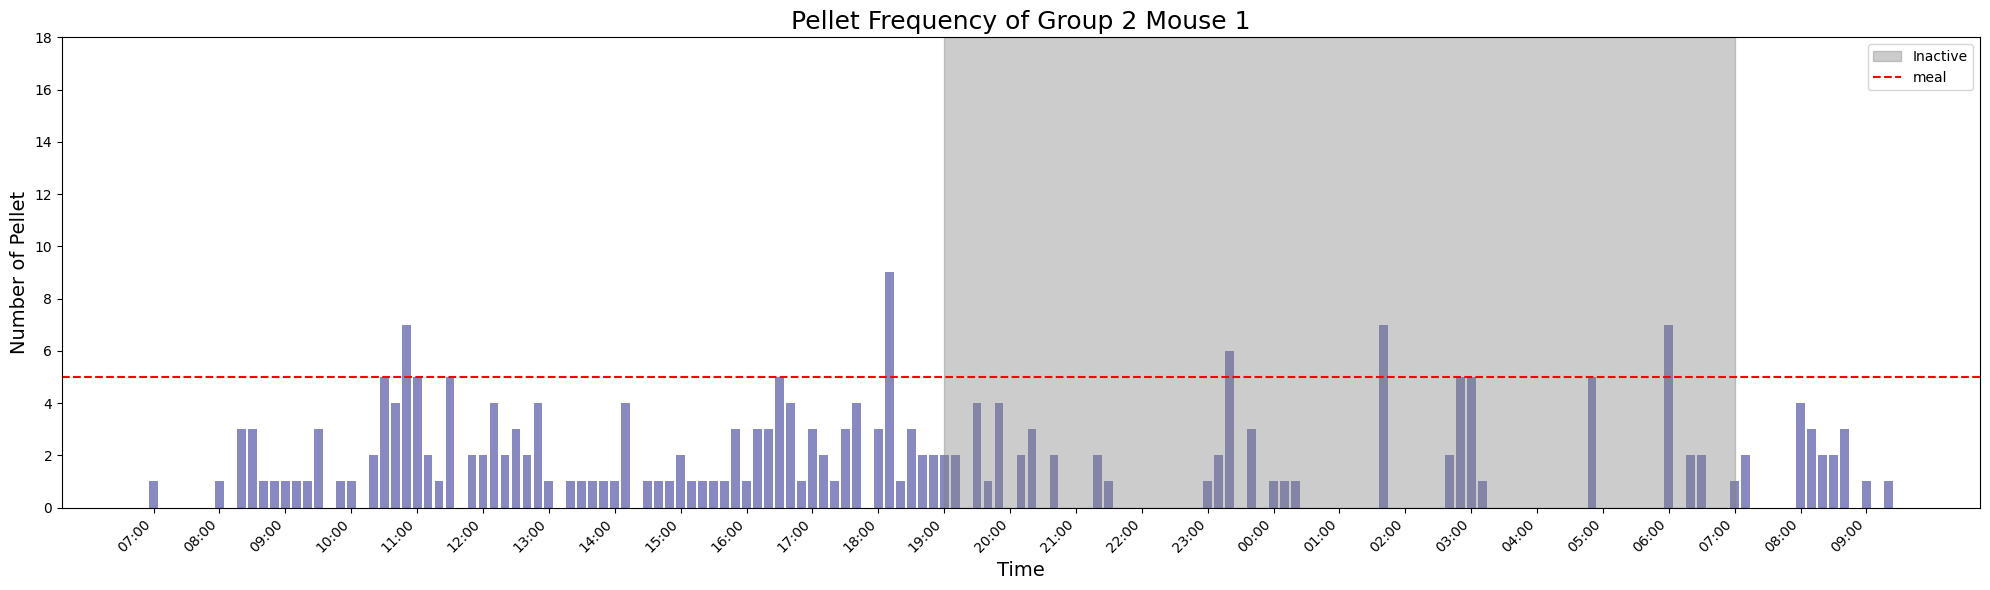

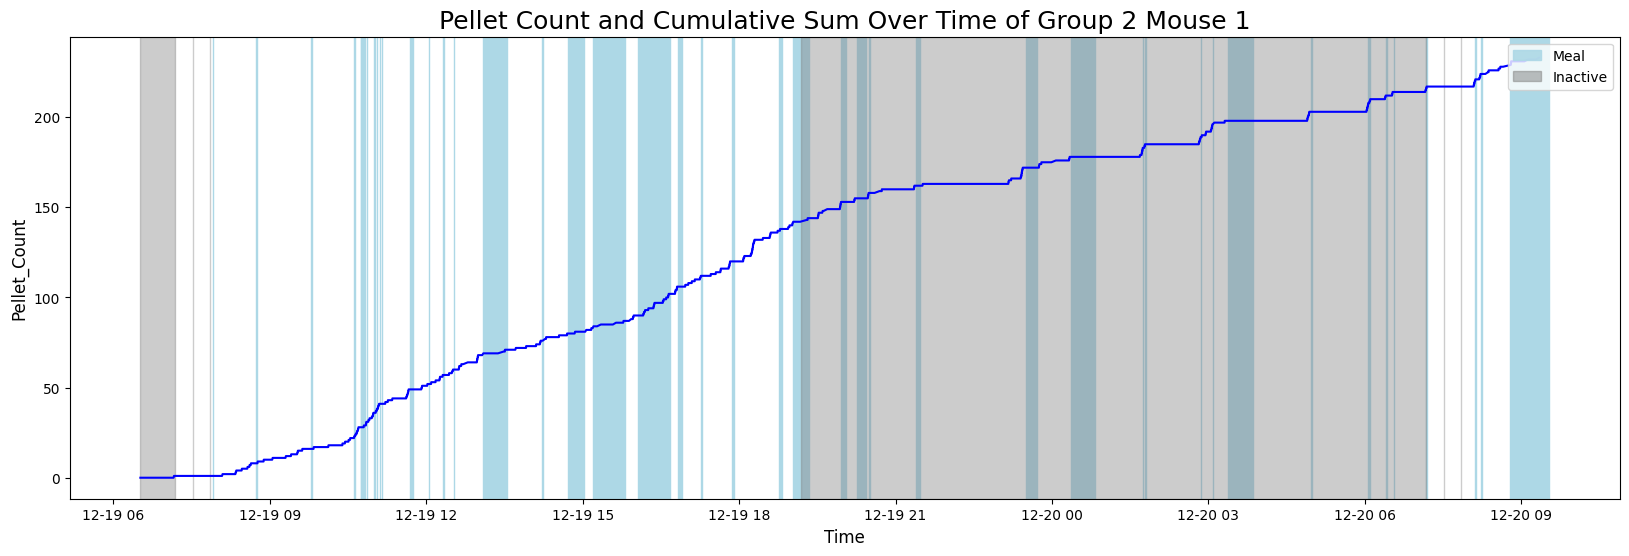

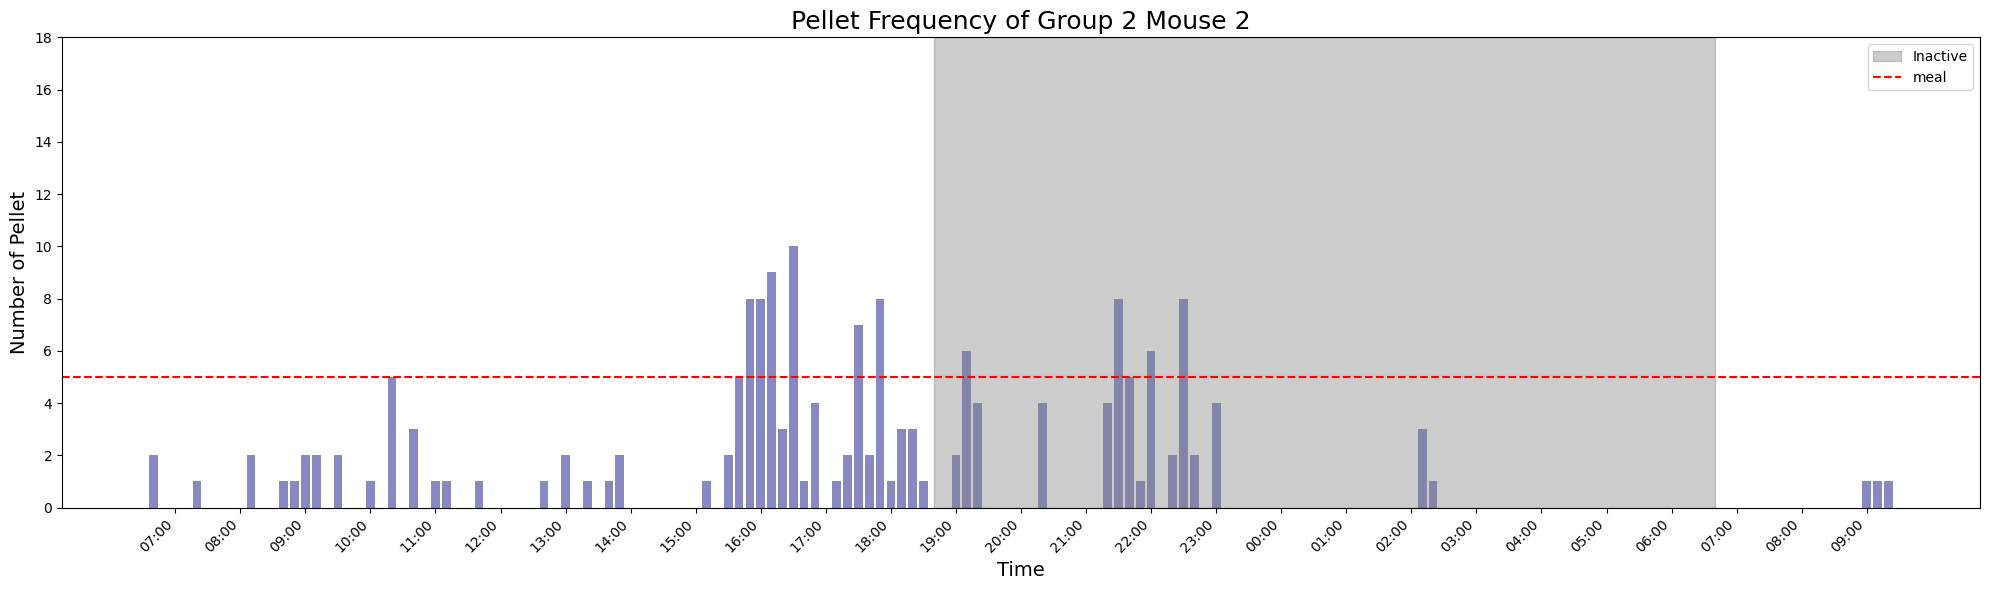

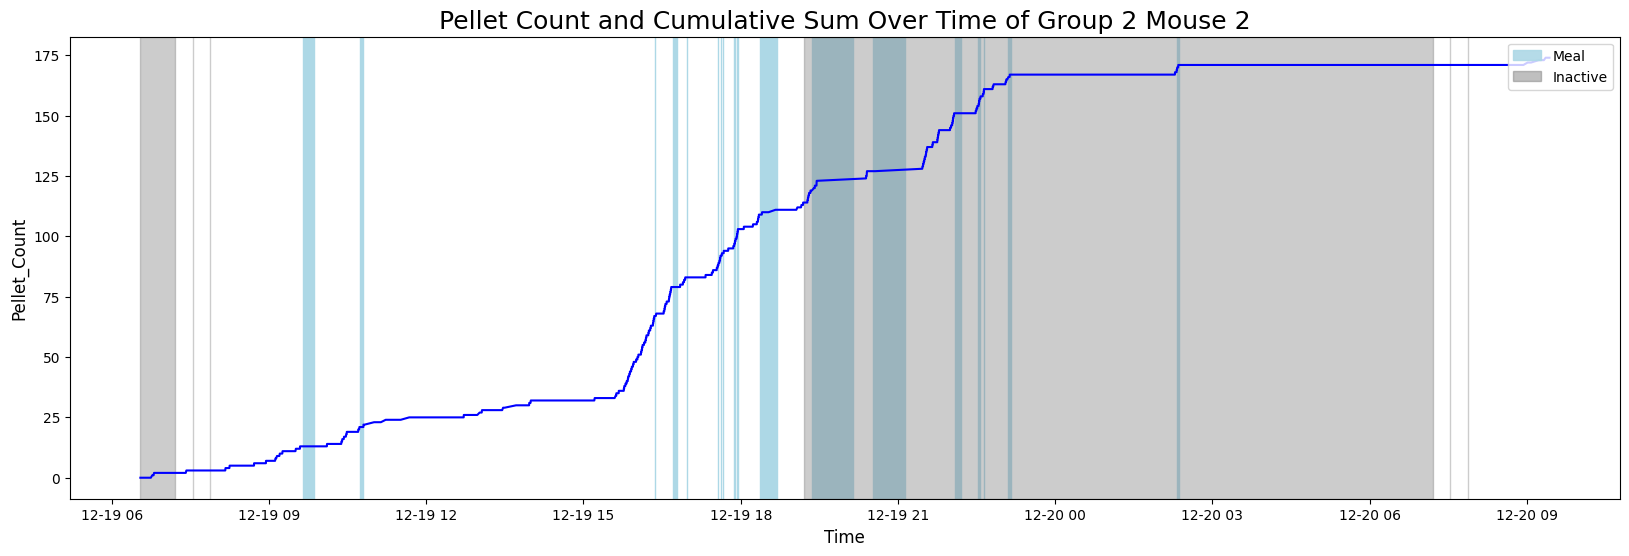

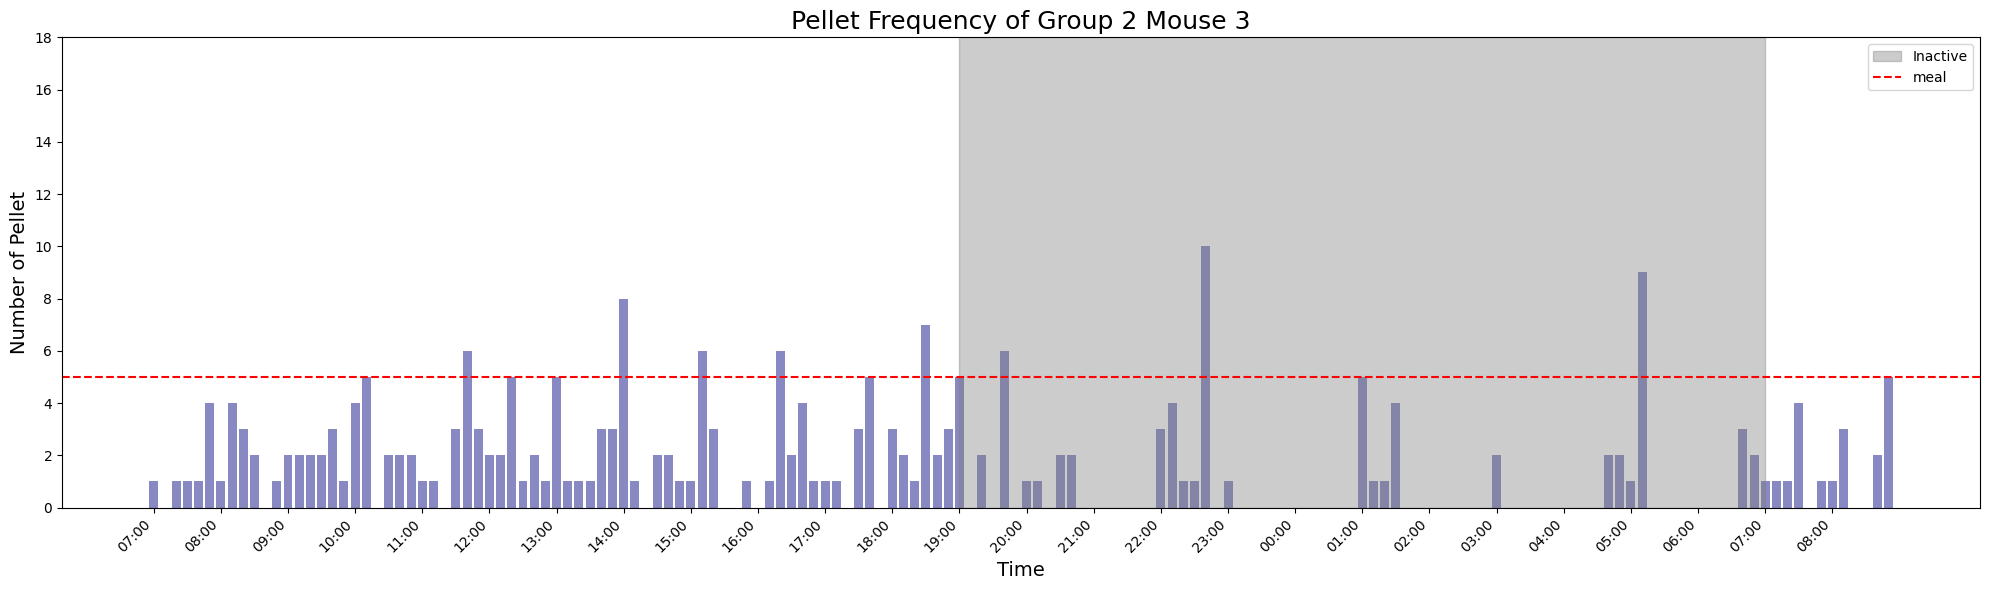

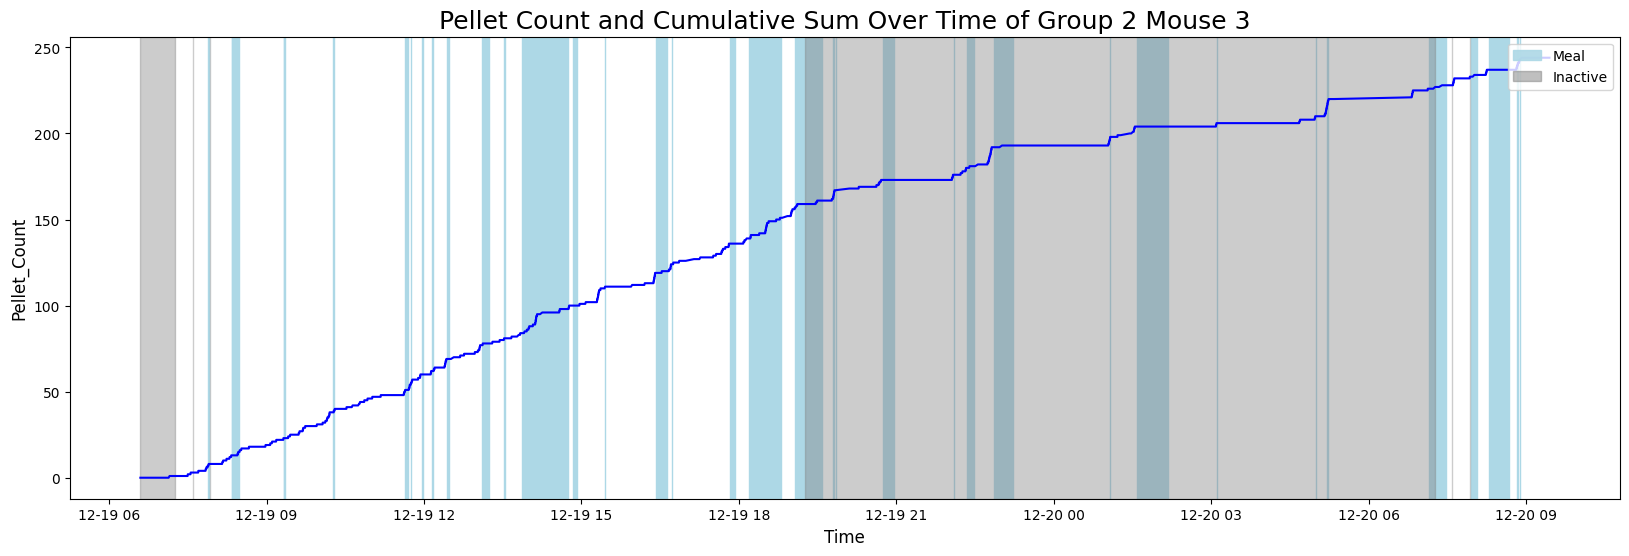

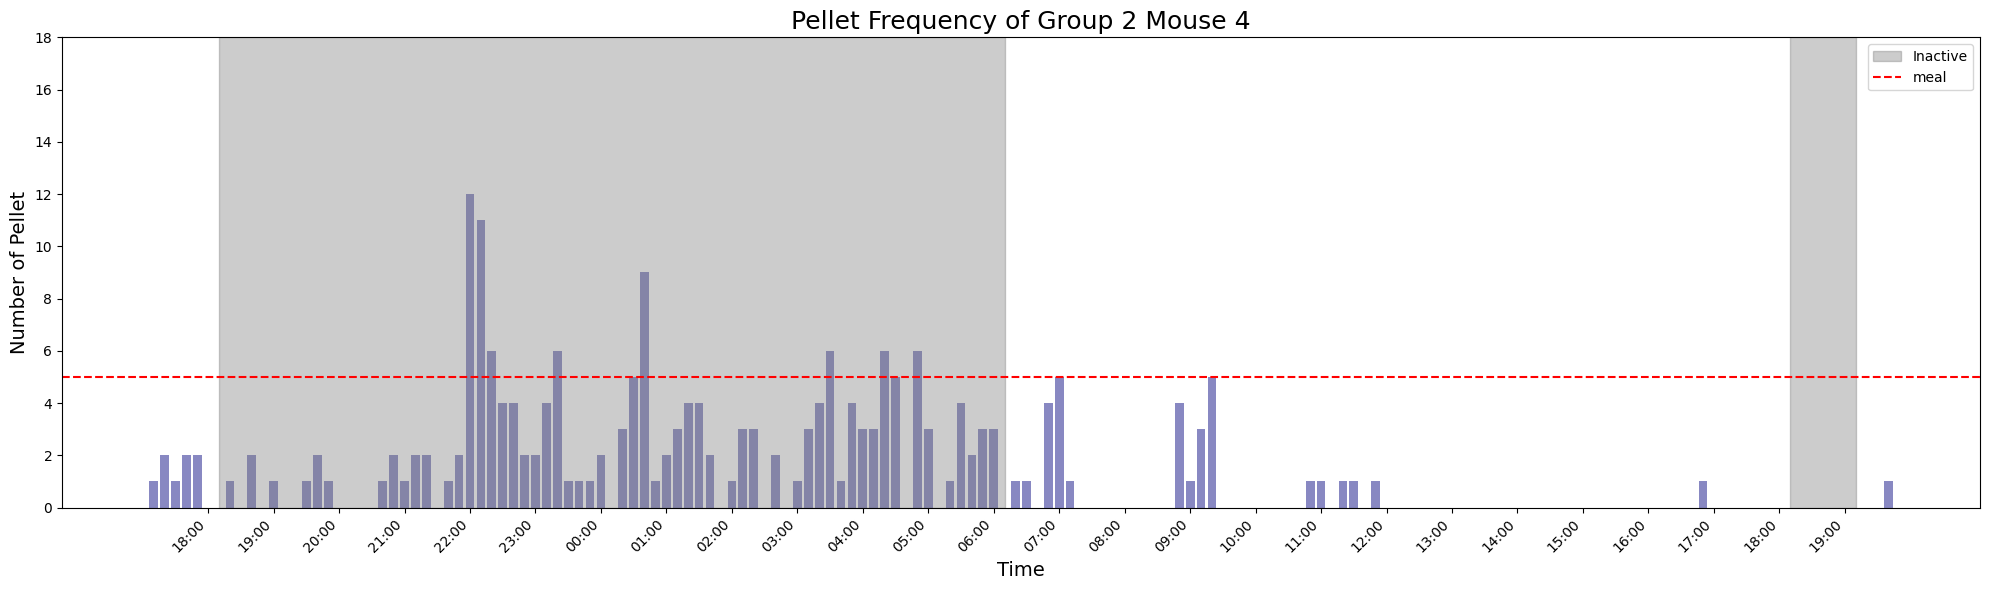

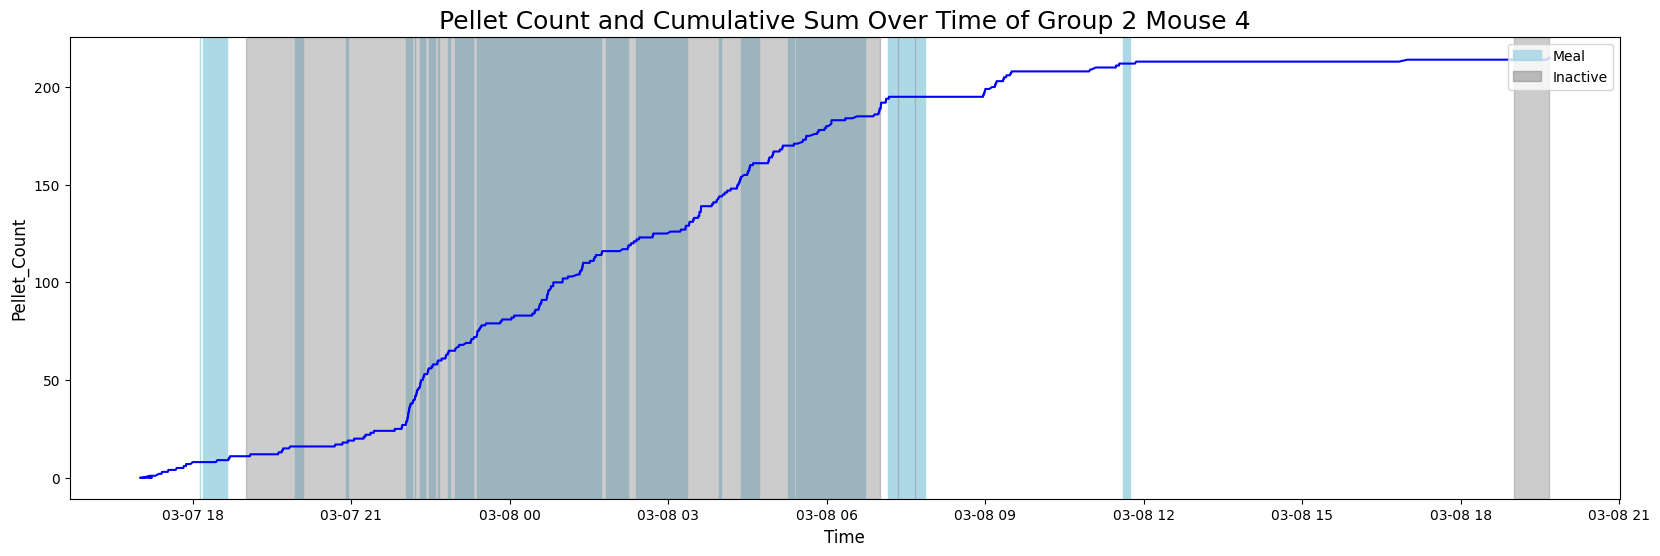

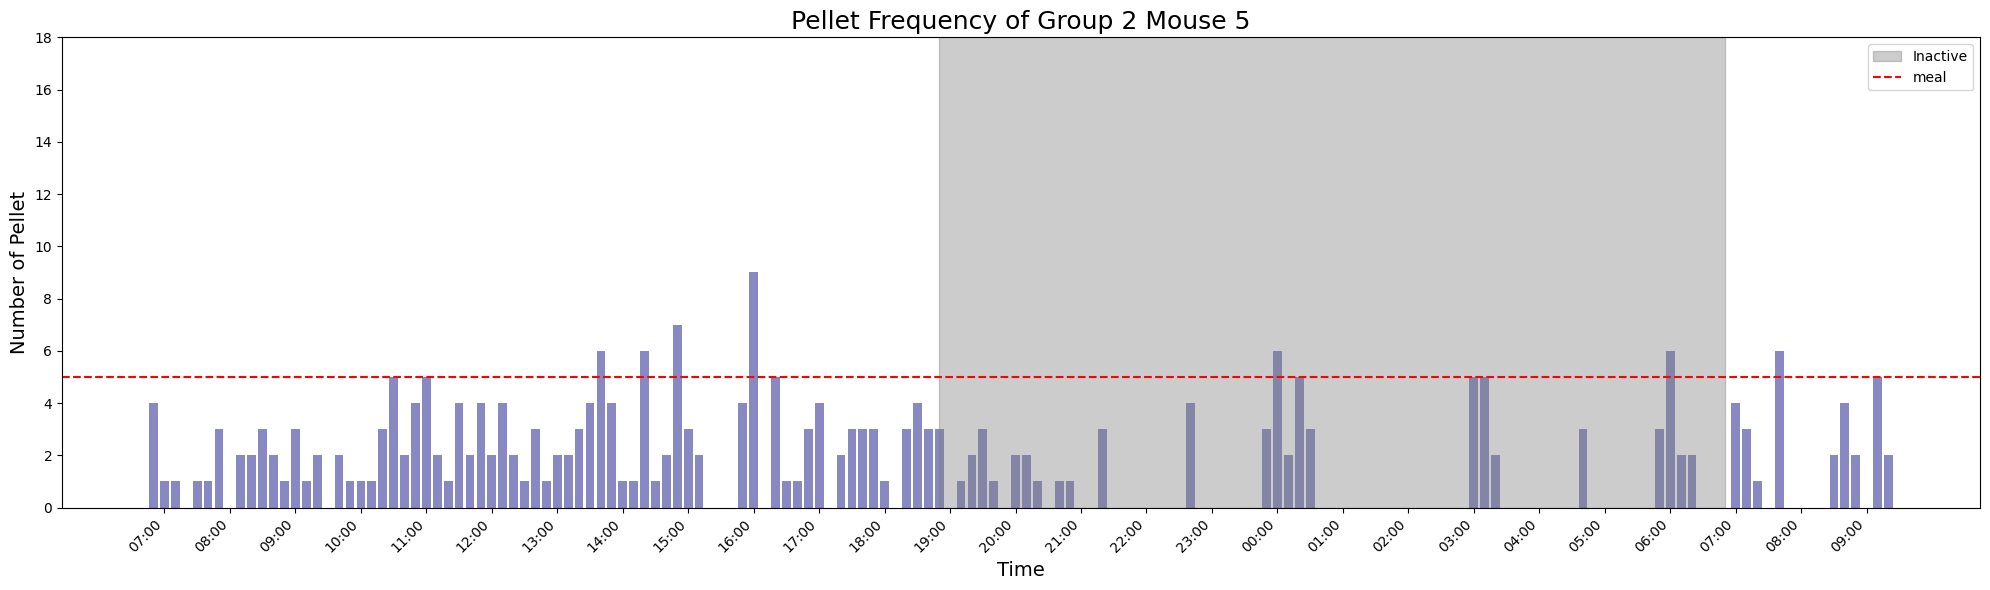

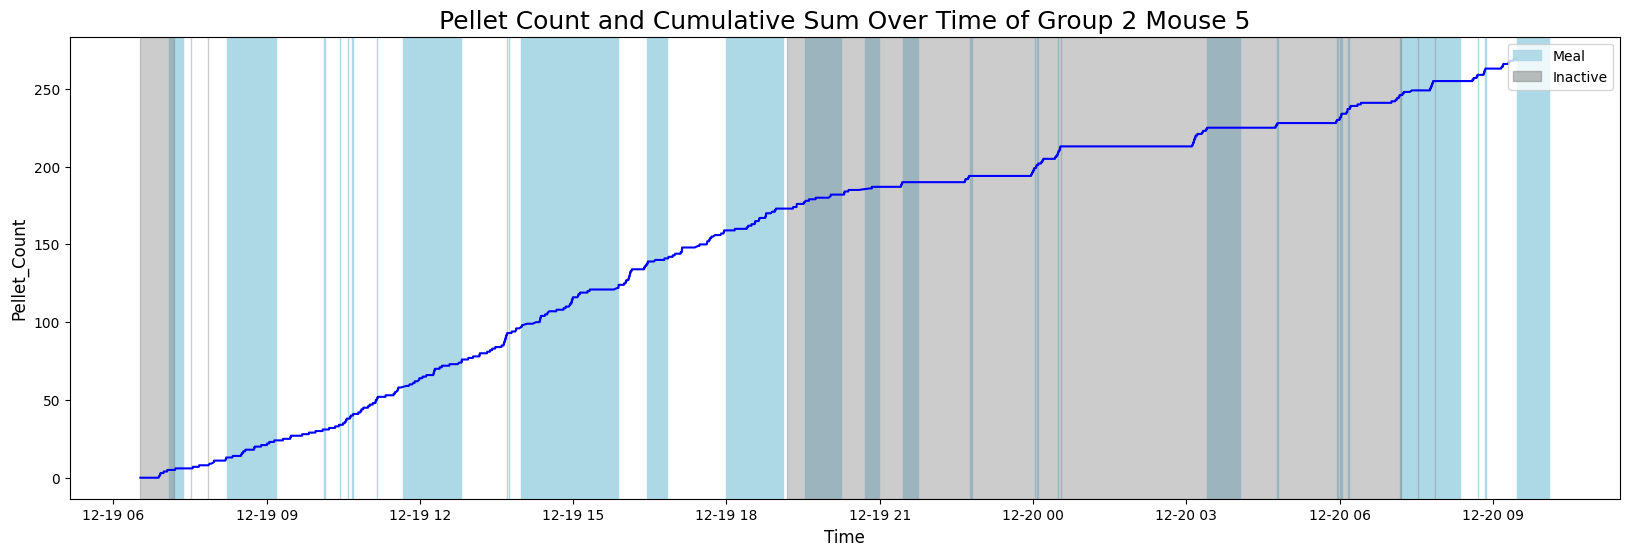

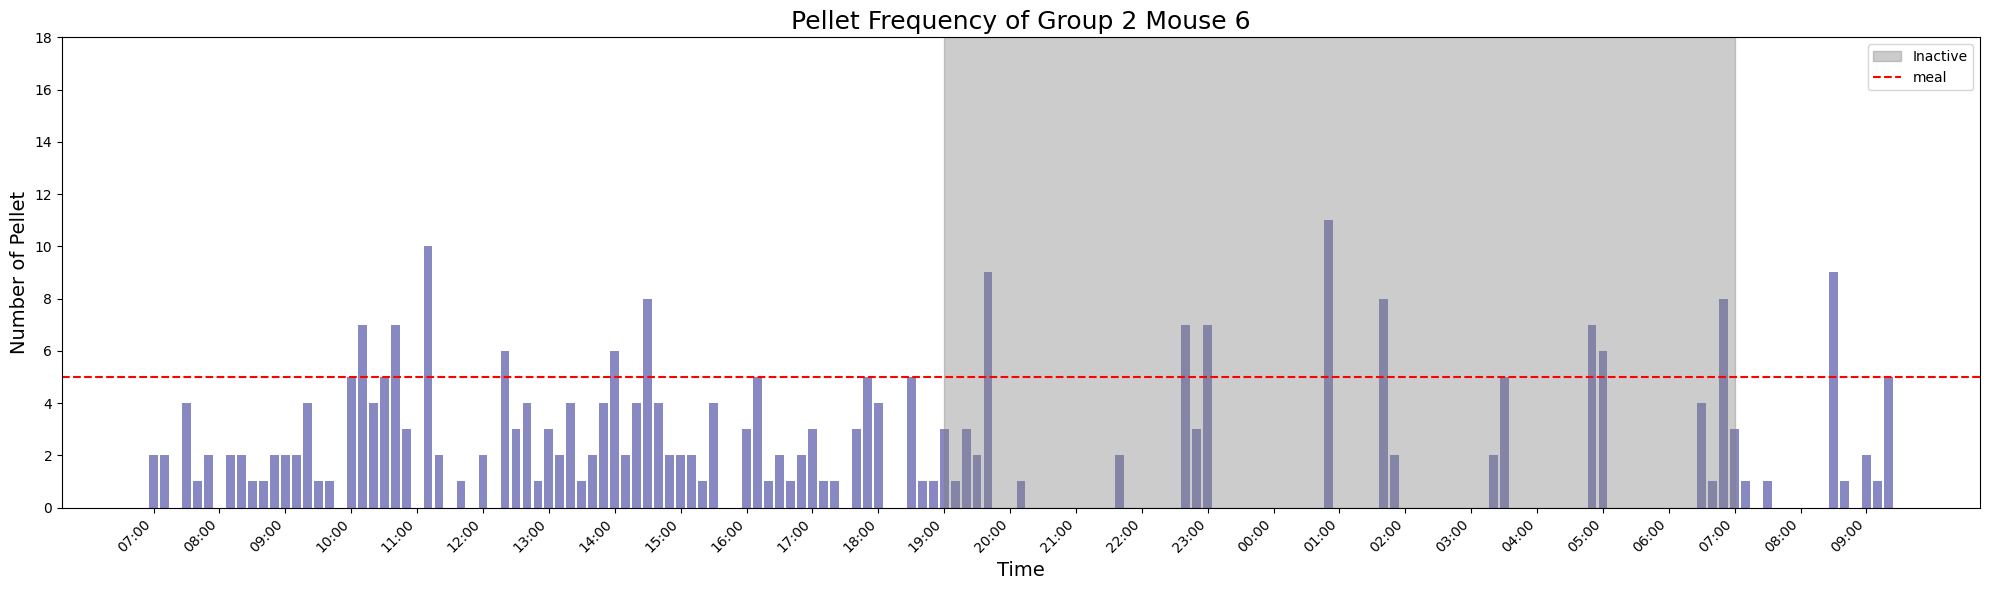

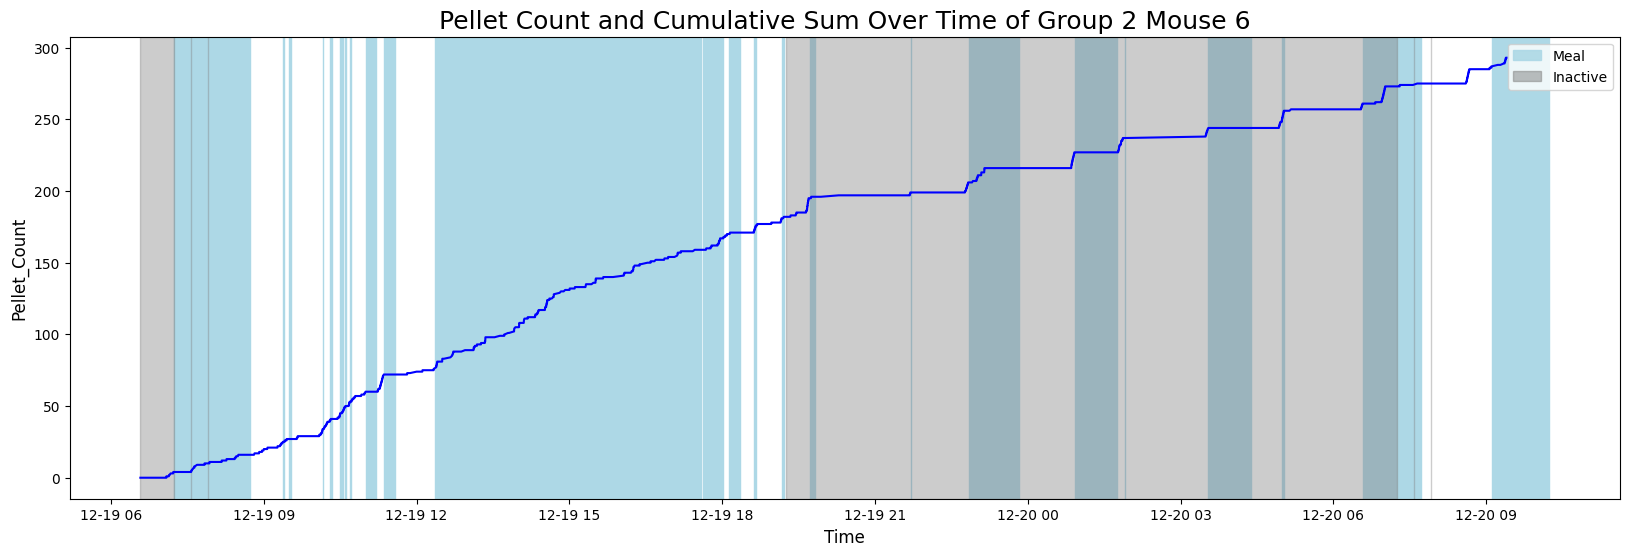

In [3]:
female_avg_pellet = [] # pellet per hour
female_dark_meals = [] # percentage of meals in inactive/dark phase
female_fir_meal = []
female_fir_good_meal = []
flip_female_meal_count = []

for sheet in fr1_female_sheets:
    data = read_excel_by_sheet(sheet=sheet, parent=fr1_female_path)
    group = ml.pellet_flip(data)
    bhv, num = tl.get_bhv_num(sheet)
    meal,_ = ml.find_meals_paper(data, time_threshold=60, pellet_threshold=2)
    meal_1 = (meal[0][0] - data['Time'][0]).total_seconds() / 3600
    meal_with_acc, first_meal_time = ml.find_first_good_meal(data, 60, 2, 'lstm')
    meal_1_good = (first_meal_time - data['Time'][0]).total_seconds() / 3600
    female_fir_meal.append(meal_1)
    female_fir_good_meal.append(meal_1_good)
    flip_female_meal_count.append(round(len(meal) / ml.experiment_duration(data), 2))
    female_avg_pellet.append(ml.average_pellet(group))
    female_dark_meals.append(ml.active_meal(meal))

    ml.graph_pellet_frequency(group, bhv, num, export_path=os.path.join(export_root, f'pellet_freq_{sheet}'))
    ml.graphing_cum_count(data, meal, bhv, num, flip=True, export_path=os.path.join(export_root, f'pellet_curve_{sheet}.svg'))

In [4]:
male_light_meals = 1 - np.array(male_dark_meals)
female_light_meals = 1 - np.array(female_dark_meals)

#### Inactive and active meal in group

In [5]:
invs.perform_T_test(male_light_meals, male_dark_meals)

P Value is  1.806176340574611e-09
There is a significant difference between the two groups.


In [6]:
invs.perform_T_test(female_dark_meals, female_light_meals)

P Value is  0.0006141291216406236
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [7]:
invs.perform_T_test(flip_male_meal_count, flip_female_meal_count, test_side='two-sided')

P Value is  0.008721450491949913
There is a significant difference between the two groups.


#### Inactive and active meal between group

In [8]:
invs.perform_T_test(male_dark_meals, female_dark_meals, test_side='two-sided')

P Value is  0.3751494317834212
There is no significant difference between the two groups.


### Average Pellet

Male Size: 17
Female Size: 13
Male Average: 249.6794117647059
Female Average: 215.69
Male Standard Deviation: 17.715805905246857
Female Standard Deviation: 8.94884184764717


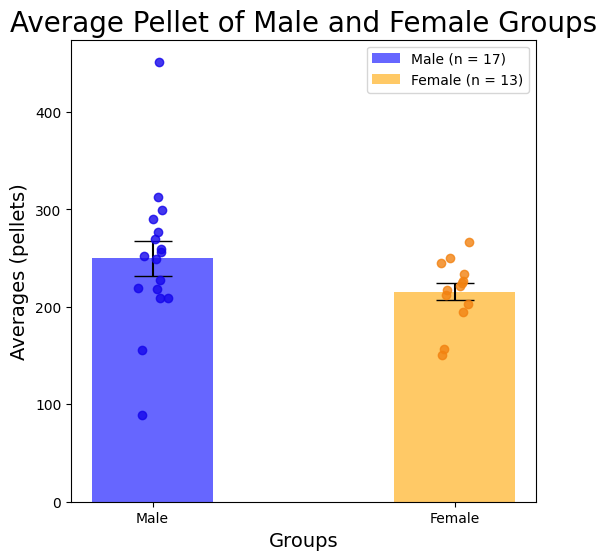

In [9]:
graph_group_stats(male_avg_pellet, female_avg_pellet, stats_name='Average Pellet', unit='pellets',
                  group_names=['Male', 'Female'], export_path=os.path.join(export_root, '..', 'average_pellets.svg'))

In [10]:
invs.perform_T_test(male_avg_pellet, female_avg_pellet, test_side='two-sided')

P Value is  0.1417423750245938
There is no significant difference between the two groups.


#### Time needed to start the first meal

Male Size: 17
Female Size: 13
Male Average: 1.537683006535948
Female Average: 1.6861068376068375
Male Standard Deviation: 0.25082103174304193
Female Standard Deviation: 0.2482927488955759


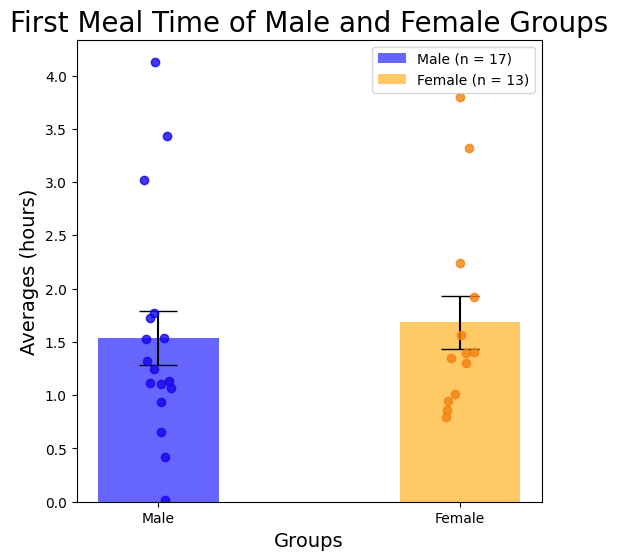

In [11]:
graph_group_stats(male_fir_meal, female_fir_meal, stats_name='First Meal Time', unit='hours', group_names=['Male', 'Female'],
                  export_path=os.path.join(export_root, '..', 'FirstMealTime.svg'))

In [12]:
invs.perform_T_test(male_fir_meal, female_fir_meal, test_side='two-sided')

P Value is  0.6932132133034448
There is no significant difference between the two groups.


In [13]:
# male_fir_good_meal.remove(max(male_fir_good_meal))
# femalefir_good_meal.remove(max(female_fir_good_meal))

Male Size: 17
Female Size: 13
Male Average: 2.549954248366013
Female Average: 2.3855299145299145
Male Standard Deviation: 0.3569017516280396
Female Standard Deviation: 0.2825517932603178


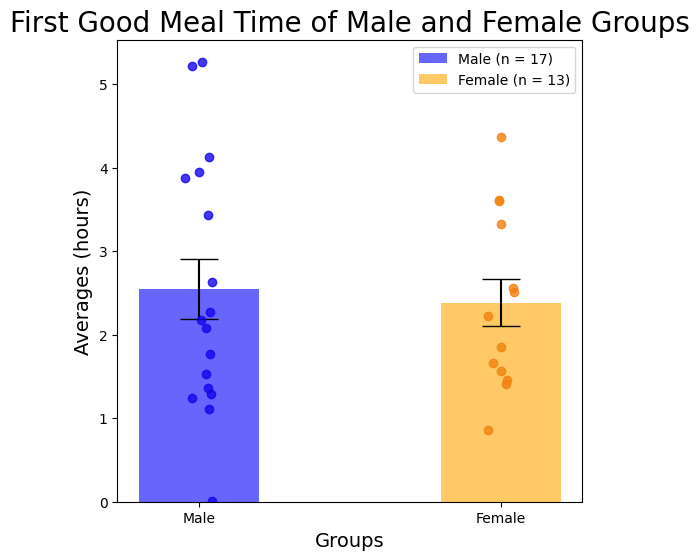

In [14]:
graph_group_stats(male_fir_good_meal, female_fir_good_meal, stats_name='First Good Meal Time', unit='hours', group_names=['Male', 'Female'],
                  export_path=os.path.join(export_root, '..','FirstGoodMealTime.svg'))

In [15]:
invs.perform_T_test(male_fir_good_meal, female_fir_good_meal, test_side='two-sided')

P Value is  0.7416537493899507
There is no significant difference between the two groups.


In [16]:
male_fir_good_meal.remove(max(male_fir_good_meal))
female_fir_good_meal.remove(max(female_fir_good_meal))

In [17]:
invs.perform_T_test(male_fir_good_meal, female_fir_good_meal, test_side='less')

P Value is  0.36616275270620335
There is no significant difference between the two groups.
